In [ ]:
# to show multiple output per chunk, seems not to work using R
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# to load data directly from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# I think to load R package and use it as magic function
%load_ext rpy2.ipython

In [ ]:
%%R # to run the chunck in R, to use everytime
MDS_data = read.csv("/content/drive/MyDrive/MDS_Project/MDS_data_20210323.csv")

NULL


In [ ]:
%%R
c(1,2,3)
"ciao"
# notice that it shows only the last input

[1] "ciao"


In [ ]:
%%R
N = dim(MDS_data)[1]
cat(c("Data Lenght: ", N))
length("id") == length(unique("id")) # patient id are unique
head(MDS_data)

Data Lenght:  2876  X center          id gender cohort prev_mds  dodx_prev WHO_prev age_prev
1 1    ICH ICH-1404963      M   HSCT      yes 2010-12-14  MDS-EB2       51
2 2    ICH ICH-5011487      F   HSCT      yes 2017-04-01  MDS-EB2       67
3 3    ICH ICH-1780511      M   HSCT      yes       <NA>     <NA>       NA
4 4    ICH ICH-1620529      M   HSCT      yes       <NA>     <NA>       NA
5 5    ICH ICH-1665557      M   HSCT       no       <NA>     <NA>       NA
6 6    ICH  ICH-504472      F   HSCT      yes       <NA>     <NA>       NA
   dodx_hsct   WHO_hsct age_hsct dodx_ngs WHO_ngs age_ngs        IPSSR
1 2011-03-15    AML-MRC       51     <NA>    <NA>      NA         <NA>
2 2017-07-15    AML-MRC       68     <NA>    <NA>      NA         <NA>
3 2017-04-21    AML-MRC       57     <NA>    <NA>      NA         <NA>
4 2013-04-15    AML-MRC       19     <NA>    <NA>      NA         <NA>
5 2014-03-15 MDS-RS-SLD       47     <NA>    <NA>      NA intermediate
6 2019-03-15    AML-MRC       5

In [ ]:
# colnames(MDS_data)

In [ ]:
HSCT = MDS_data[which(cohort=="HSCT"),] # HSCT dataset
N_HSCT = dim(HSCT)[1]
DNH = MDS_data[which(cohort=="DNH"),] # DNH dataset
N_DNH = dim(DNH)[1]
cat(c("HSCT Lenght: ", N_HSCT))
cat(c("\nDNH Lenght: ", N_DNH))

HSCT Lenght:  789
DNH Lenght:  2043

### According to the legend guide remove irrelevant columns respectively

In [ ]:
cols_HSCT <- colnames(HSCT)

remove_from_HSCT <- c(dodx_ngs, WHO_ngs, age_ngs, AML, doaml)
cols_HSCT[! cols_HSCT %in% remove_from_HSCT]

[1] "center"        "id"            "gender"        "cohort"       
 [5] "dodx_prev"     "WHO_prev"      "age_prev"      "dodx_hsct"    
 [9] "WHO_hsct"      "age_hsct"      "dodx_ngs"      "WHO_ngs"      
[13] "age_ngs"       "IPSSR"         "genomic_group" "hgb"          
[17] "leu"           "neut"          "plt"           "bmblasts"     
[21] "KT_ISCN"       "KT_IPSSR"      "KT_complex"    "del5q"        
[25] "loss5"         "loss7"         "trisomy8"      "loss9"        
[29] "loss11"        "loss12"        "loss13"        "isochr17"     
[33] "loss20"        "lossY"         "idicX"         "n_mutgenes"   
[37] "n_mutations"   "ASXL1"         "ATRX"          "BCOR"         
[41] "BCORL1"        "BRAF"          "CALR"          "CBL"          
[45] "CBLB"          "CEBPA"         "CSF3R"         "DNMT3A"       
[49] "ETV6"          "EZH2"          "FBXW7"         "FLT3"         
[53] "GATA2"         "GNAS"          "GNB1"          "IDH1"         
[57] "IDH2"          "JAK2"          "KDM6A"         "KIT"          
[61] "KRAS"          "MPL"           "NF1"           "NOTCH1"       
[65] "NPM1"          "NRAS"          "PHF6"          "PIGA"         
[69] "PPM1D"         "PRPF40B"       "PTPN11"        "RAD21"        
[73] "RUNX1"         "SETBP1"        "SF3B1"         "SMC1A"        
[77] "SMC3"          "SRSF2"         "STAG2"         "TET2"         
[81] "TP53"          "U2AF1"         "WT1"           "ZRSR2"        
[85] "dohsct"        "relapse"       "dorel"         "AML"          
[89] "doaml"         "dofup"         "fup_status"

In [ ]:
cols_DNH <- colnames(DNH)

remove_from_DNH <- c(dodx_prev, WHO_prev, age_prev, dodx_hsct, WHO_hsct, age_hsct, dohsct, relapse, dorel)
cols_HSCT[! cols_DNH %in% remove_from_DNH]

[1] "center"        "id"            "gender"        "cohort"       
 [5] "dodx_prev"     "WHO_prev"      "age_prev"      "dodx_hsct"    
 [9] "WHO_hsct"      "age_hsct"      "dodx_ngs"      "WHO_ngs"      
[13] "age_ngs"       "IPSSR"         "genomic_group" "hgb"          
[17] "leu"           "neut"          "plt"           "bmblasts"     
[21] "KT_ISCN"       "KT_IPSSR"      "KT_complex"    "del5q"        
[25] "loss5"         "loss7"         "trisomy8"      "loss9"        
[29] "loss11"        "loss12"        "loss13"        "isochr17"     
[33] "loss20"        "lossY"         "idicX"         "n_mutgenes"   
[37] "n_mutations"   "ASXL1"         "ATRX"          "BCOR"         
[41] "BCORL1"        "BRAF"          "CALR"          "CBL"          
[45] "CBLB"          "CEBPA"         "CSF3R"         "DNMT3A"       
[49] "ETV6"          "EZH2"          "FBXW7"         "FLT3"         
[53] "GATA2"         "GNAS"          "GNB1"          "IDH1"         
[57] "IDH2"          "JAK2"          "KDM6A"         "KIT"          
[61] "KRAS"          "MPL"           "NF1"           "NOTCH1"       
[65] "NPM1"          "NRAS"          "PHF6"          "PIGA"         
[69] "PPM1D"         "PRPF40B"       "PTPN11"        "RAD21"        
[73] "RUNX1"         "SETBP1"        "SF3B1"         "SMC1A"        
[77] "SMC3"          "SRSF2"         "STAG2"         "TET2"         
[81] "TP53"          "U2AF1"         "WT1"           "ZRSR2"        
[85] "dohsct"        "relapse"       "dorel"         "AML"          
[89] "doaml"         "dofup"         "fup_status"

# Univariate Analysis

## Helper Functions

In [ ]:
hist_plot <- function(lst, mfrow=c(1,1), data=HSCT){
    par(mfrow = c(mfrow))
    for (item in lst){
        item_val = data[[item]]
        hist(item_val, main=sprintf("Histigram of %s",item))
        item_val.mean = mean(item_val, na.rm=T)
        abline(v=item_val.mean, col="red", lty=2)
    }
}

bar_plot <- function(lst,mfrow=c(1,1), data=HSCT, factor=FALSE){
    par(mfrow=c(mfrow))
    for (item in lst){
        item_val = data[[item]]
        item_val.freq = round(prop.table(table(item_val)),2)
        printList(data.frame(c(sprintf("\n%s\nFrequencies: ",item), item_val.freq)))
        printList(c("\nNumber of None Values: ", sum(is.na(item_val))))
        if (factor){
            plot(as.factor(item_val), main = sprintf("%s Frequencies", item))
        } else {
            plot(item_val, main = sprintf("%s Frequencies", item))
        }
    }
}

printList <- function(lst) {
  for (item in 1:length(lst)) {
    cat(head(lst[[item]]), " ")
  }
}

printNoneCount <- function(lst) {
    for (item in lst){
        cat(sprintf("%d None values in %s\n", sum(is.na(HSCT[[item]])), item))
    }
}

# HSCT

In [ ]:
detach(MDS_data)
attach(HSCT)

### None values for dates

**dodx_prev:** given MDS diagnosis for transplant patients after evolution to AML

**dodx_hsct:** diagnosis of the disease at the stage when the transplant is done

**dodx_ngs:** MDS diagnosis date

In [ ]:
# cat(c("ddox_prev: ",sum(is.na(dodx_prev))))
# cat(c("\nddox_hsct: ",sum(is.na(dodx_hsct))))
# cat(c("\nddox_prev: ",sum(is.na(dodx_ngs))))
printNoneCount("dodx_prev")

715 None values in dodx_prev


### WHO_prev

WHO category previous diagnosis

diagnostic category according to WHO 2016 of the type of MDS prior to leukemic evolution (only for patients transplanted after)
### WHO_hsct
WHO category (2016) (DISEASE AT TRANSPLANT)

diagnostic category according to WHO 2016 of the type of MDS or AML depending on the stage in which the transplant is done


WHO_prev
Frequencies:  0.31 0.36 0.12 0.02 0.12  
Number of None Values:   731  
WHO_hsct
Frequencies:  0.29 0.19 0.33 0.12 0.01  
Number of None Values:   0  

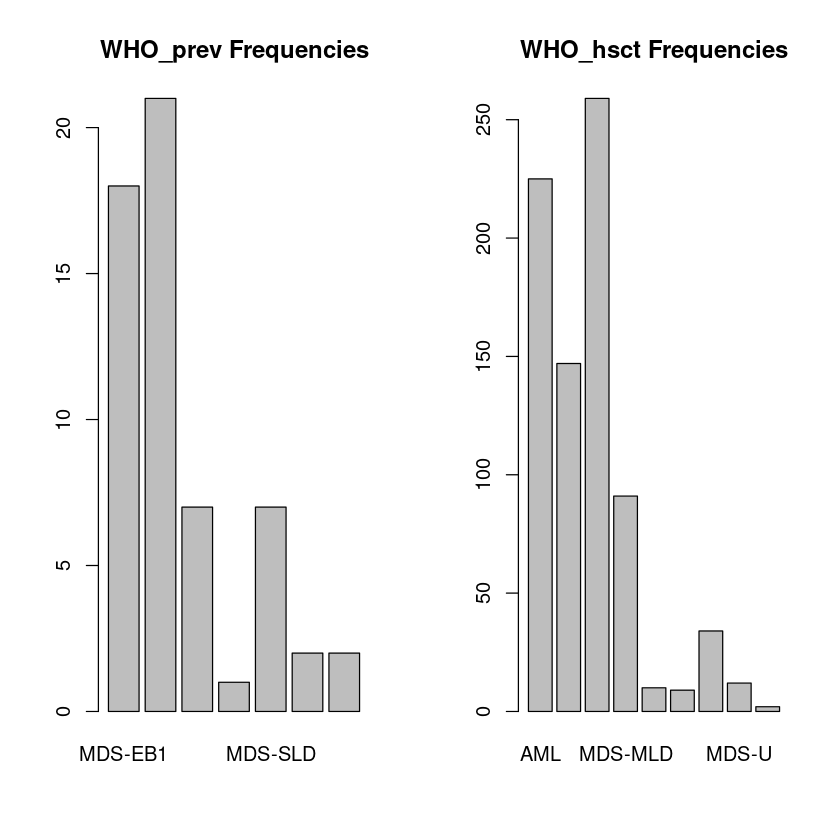

In [ ]:
bar_plot(list("WHO_prev", "WHO_hsct"), c(1,2), HSCT)

### age_prev

Age at MDS diagnosis

(age at diagnosis of MDS for transplant patients after evolution to AML)
### age_hsct
Age at diagnosis (DISEASE AT TRANSPLANT)

(age at diagnosis of the disease at the stage when the transplant is done)

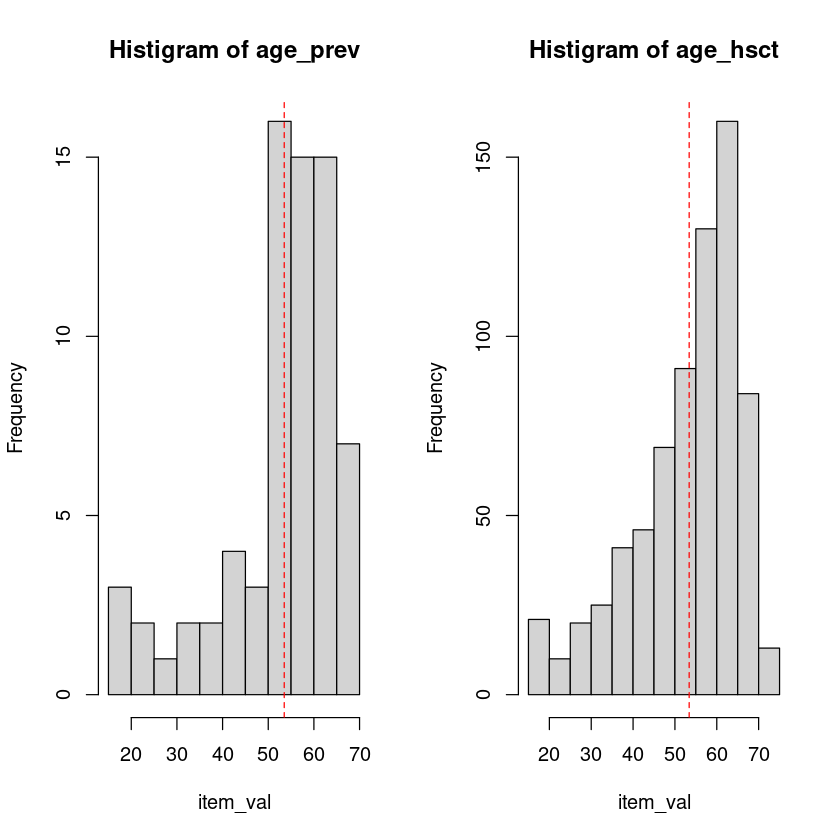

In [ ]:
hist_plot(list("age_prev", "age_hsct"), c(1,2), HSCT)

### IPSSR

IPSSR risk group (<1,5=very low/1,5-3=low/>3-4,5=intermediate/>4,5-6=high/>6=very high) 

IPSSR (Revised International Prognostic Scoring System) risk group at the diagnosis for DNH cohort and at the diagnosis of the disease in the phase in which the transplant is done for the HSCT cohort


IPSSR
Frequencies:  0.29 0.23 0.11 0.35 0.02  
Number of None Values:   394  

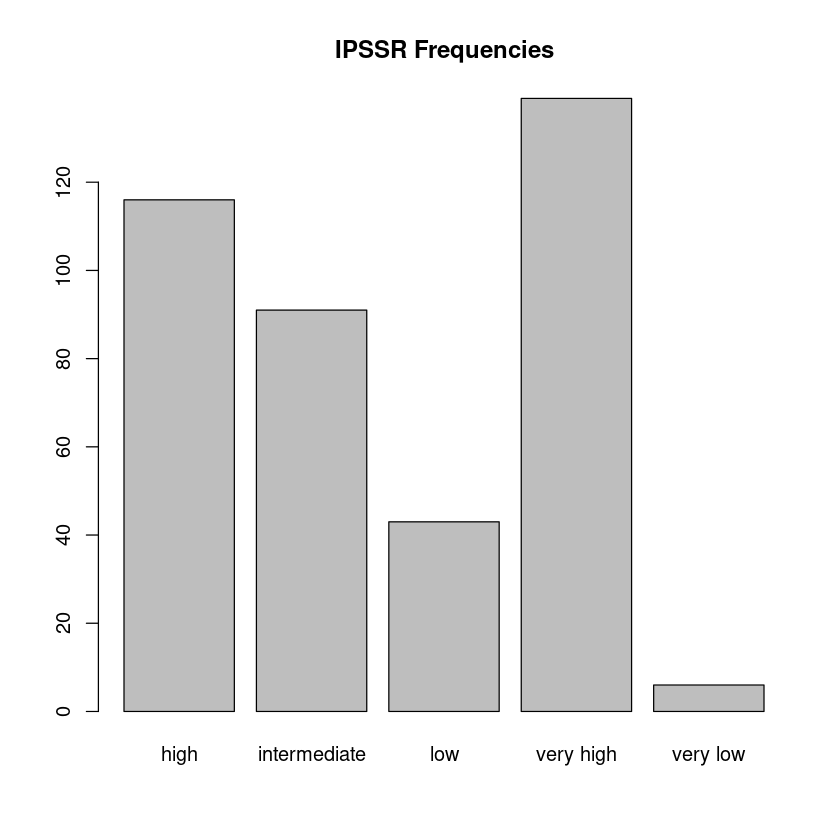

In [ ]:
bar_plot(list("IPSSR"), c(1,1), HSCT)

### genomic_group

Genomic based MDS group

(* only for patients whose definition is currently available)


genomic_group
Frequencies:  0.19 0.08 0.14 0.2 0.07  
Number of None Values:   442  

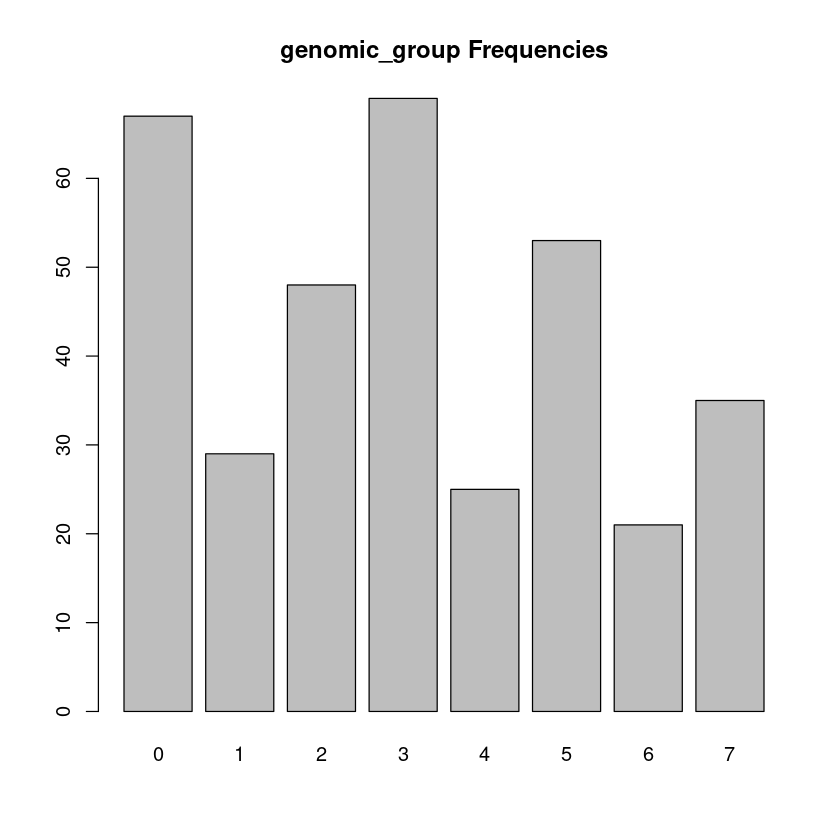

In [ ]:
bar_plot(list("genomic_group"), c(1,1), HSCT)

### Hematological markers
**hgb**
Hemoglobin g/l

**leu**
Leucocytes (x10^9/L)

**neut**
Neutrophils (x10^9/l)

**plt**
Platelets x109/L

In [ ]:
printNoneCount(list("hgb", "leu", "neut", "plt"))

132 None values in hgb
207 None values in leu
206 None values in neut
210 None values in plt


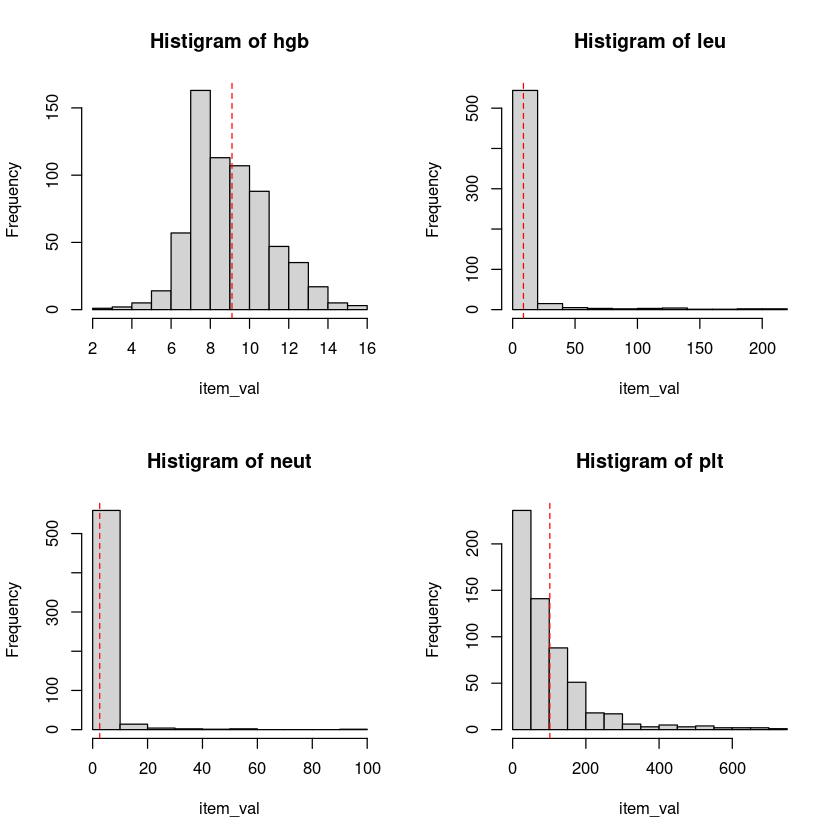

In [ ]:
hist_plot(list("hgb", "leu", "neut", "plt"), c(2,2), HSCT)

### bmblasts

% bone marrow blasts

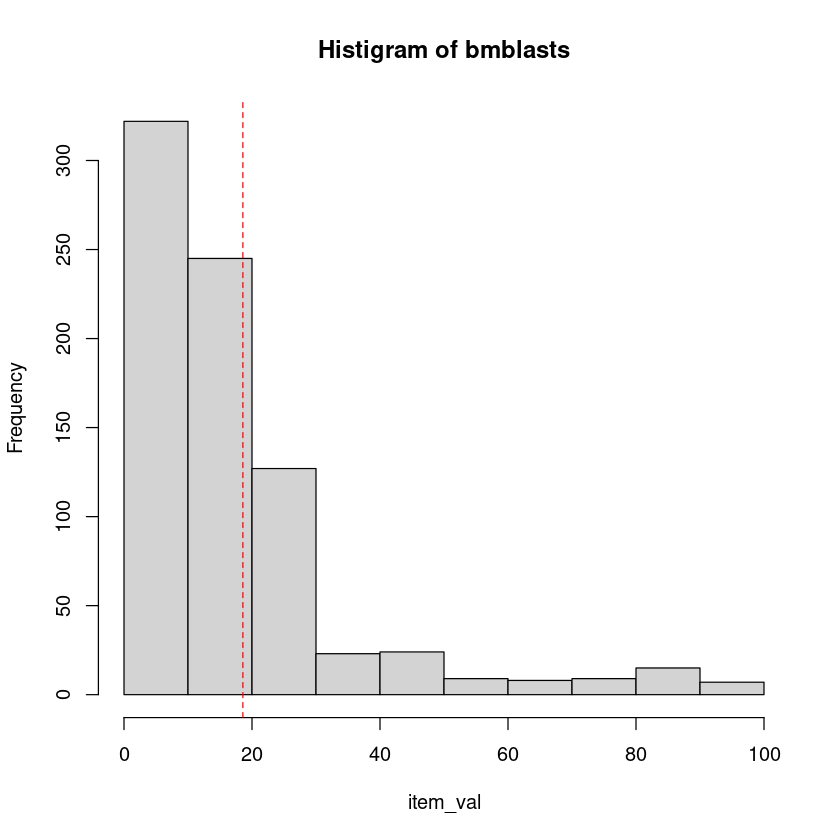

In [ ]:
hist_plot(list("bmblasts"))

### KT_IPSSR 

IPSSR based on karyotype


KT_IPSSR
Frequencies:  0.01 0.52 0.17 0.16 0.13  
Number of None Values:   97  

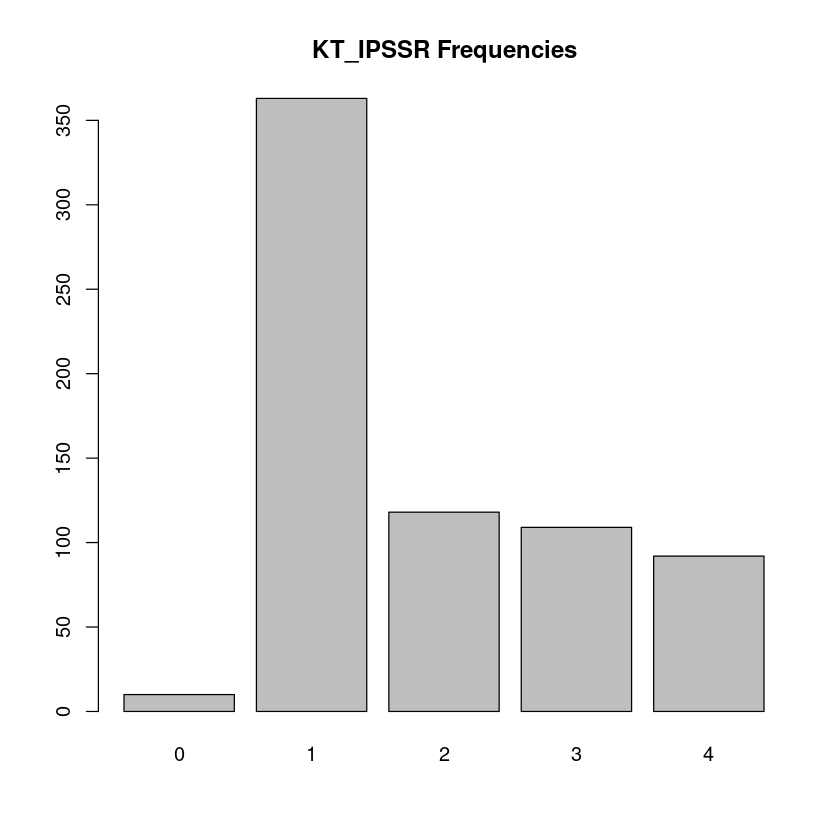

In [ ]:
bar_plot(list("KT_IPSSR"))

### KT_complex

namely >= 3 abnormalities, boolean



KT_complex
Frequencies:  0.83 0.17  
Number of None Values:   97  

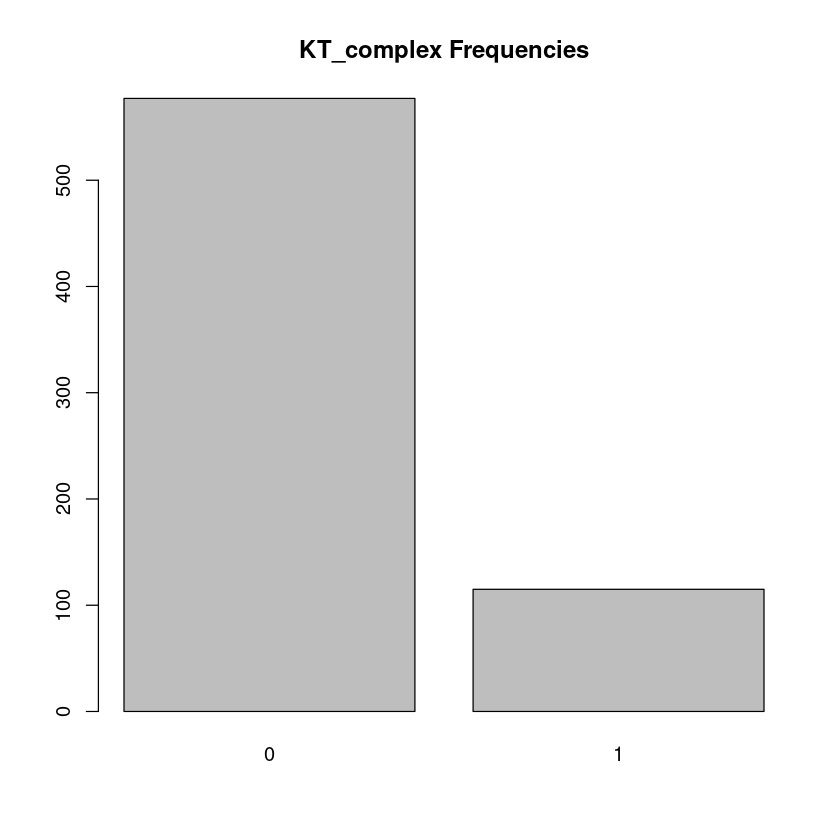

In [ ]:
bar_plot(list("KT_complex"), factor = TRUE)

### karyotype abnormalities 

all boolean


del5q
Frequencies:  0.97 0.03  
Number of None Values:   119  
loss5
Frequencies:  0.89 0.11  
Number of None Values:   119  
loss7
Frequencies:  0.83 0.17  
Number of None Values:   119  
trisomy8
Frequencies:  0.9 0.1  
Number of None Values:   119  
loss9
Frequencies:  0.98 0.02  
Number of None Values:   119  
loss11
Frequencies:  0.96 0.04  
Number of None Values:   119  
loss12
Frequencies:  0.96 0.04  
Number of None Values:   119  
loss13
Frequencies:  0.97 0.03  
Number of None Values:   119  
isochr17
Frequencies:  0.94 0.06  
Number of None Values:   119  
loss20
Frequencies:  0.92 0.08  
Number of None Values:   119  
lossY
Frequencies:  0.97 0.03  
Number of None Values:   384  
idicX
Frequencies:  1 0  
Number of None Values:   119  

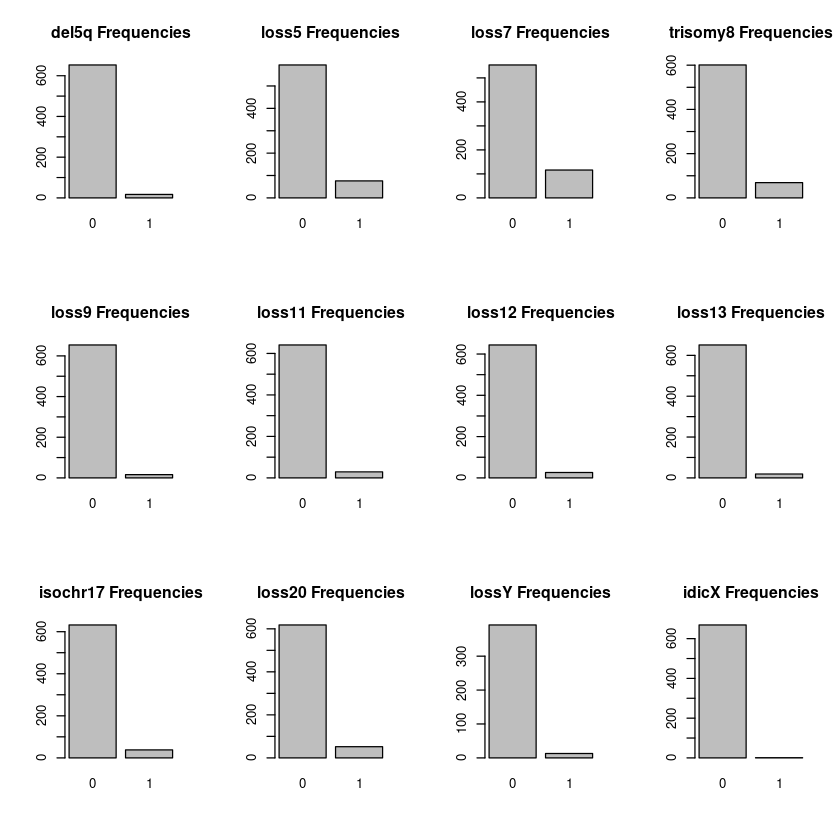

In [ ]:
ka <- list("del5q", "loss5", "loss7", "trisomy8", "loss9", "loss11",
          "loss12", "loss13", "isochr17", "loss20", "lossY", "idicX")
bar_plot(ka, c(3,4), factor = TRUE)

### n_ mutgenes
N of mutated genes
### n_mutations
N of mutations


n_mutgenes
Frequencies:  0.36 0.27 0.16 0.11 0.06  
Number of None Values:   0  
n_mutations
Frequencies:  0.4 0.24 0.14 0.11 0.05  
Number of None Values:   0  

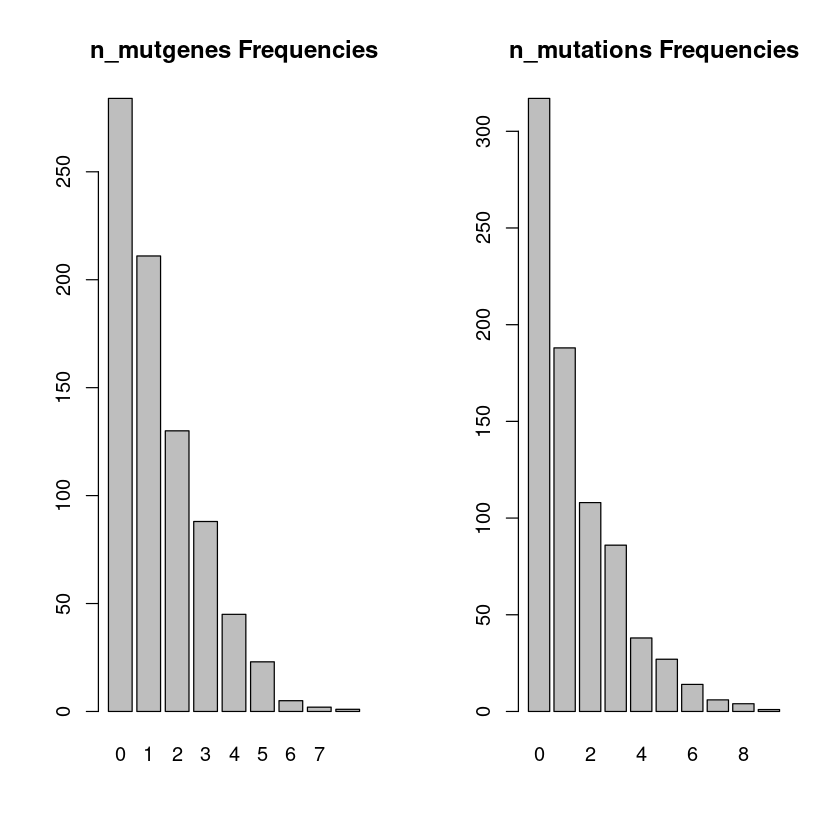

In [ ]:
bar_plot(list("n_mutgenes","n_mutations"), c(1,2), factor = TRUE)

In [ ]:
printNoneCount(list("dohsct", "relapse", "dorel", "dofup"))

0 None values in dohsct
0 None values in relapse
631 None values in dorel
0 None values in dofup


### fup_status

Outcome at last Follow-up (Alive=0/Dead=1)


fup_status
Frequencies:  0.5 0.5  
Number of None Values:   0  

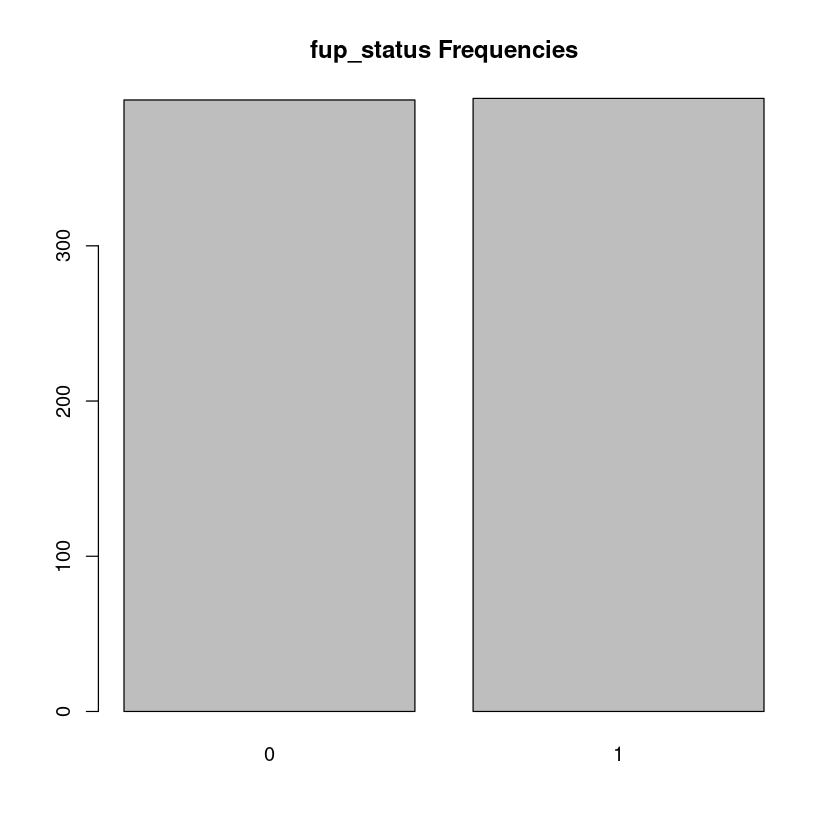

In [ ]:
bar_plot(list("fup_status"), factor = TRUE)

# DNH

In [ ]:
detach(HSCT)
attach(DNH)

In [ ]:
printNoneCount(list("dodx_ngs"))

789 None values in dodx_ngs


### WHO_ngs

WHO category (2016) (DISEASE AT NGS)


WHO_ngs
Frequencies:  0.16 0.32 0.2 0.12 0.1  
Number of None Values:   0  

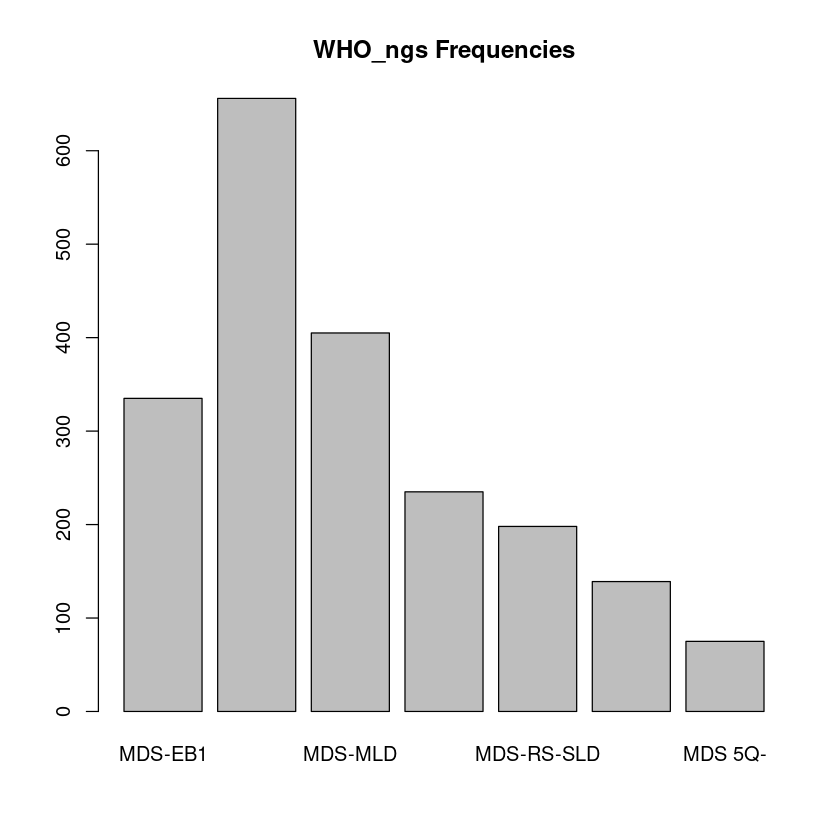

In [ ]:
bar_plot(list("WHO_ngs"), data = DNH, factor = FALSE)

### age_ngs

Age at diagnosis (DISEASE AT NGS)

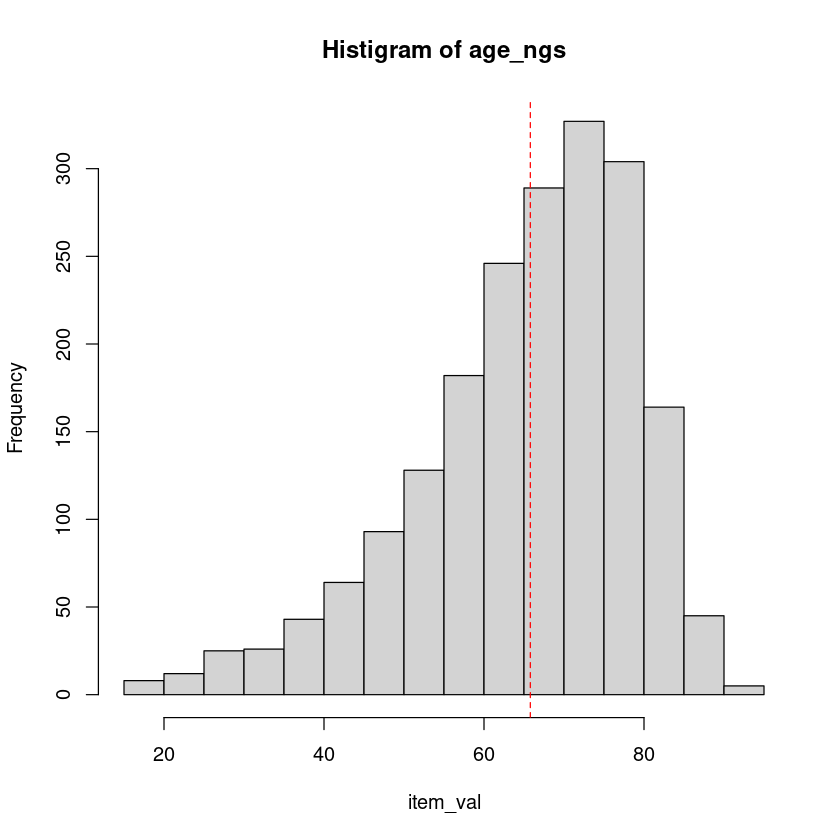

In [ ]:
hist_plot(list("age_ngs"), data=DNH)

### IPSSR


IPSSR
Frequencies:  0.17 0.2 0.36 0.13 0.12  
Number of None Values:   420  

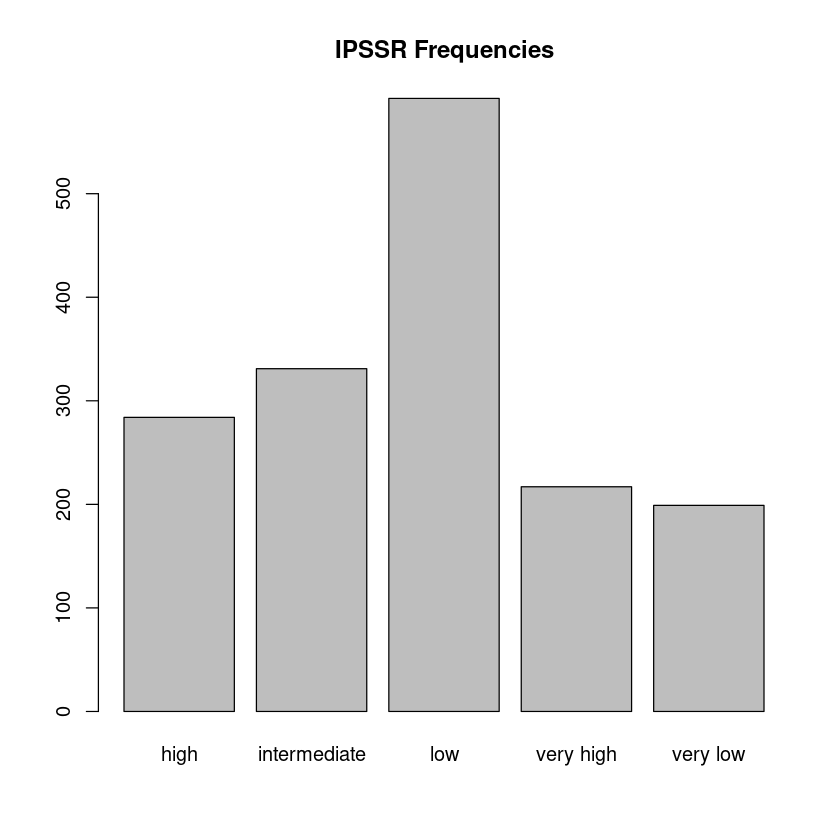

In [ ]:
bar_plot(list("IPSSR"), data=DNH)

### genomic_group


genomic_group
Frequencies:  0.19 0.08 0.14 0.2 0.07  
Number of None Values:   442  

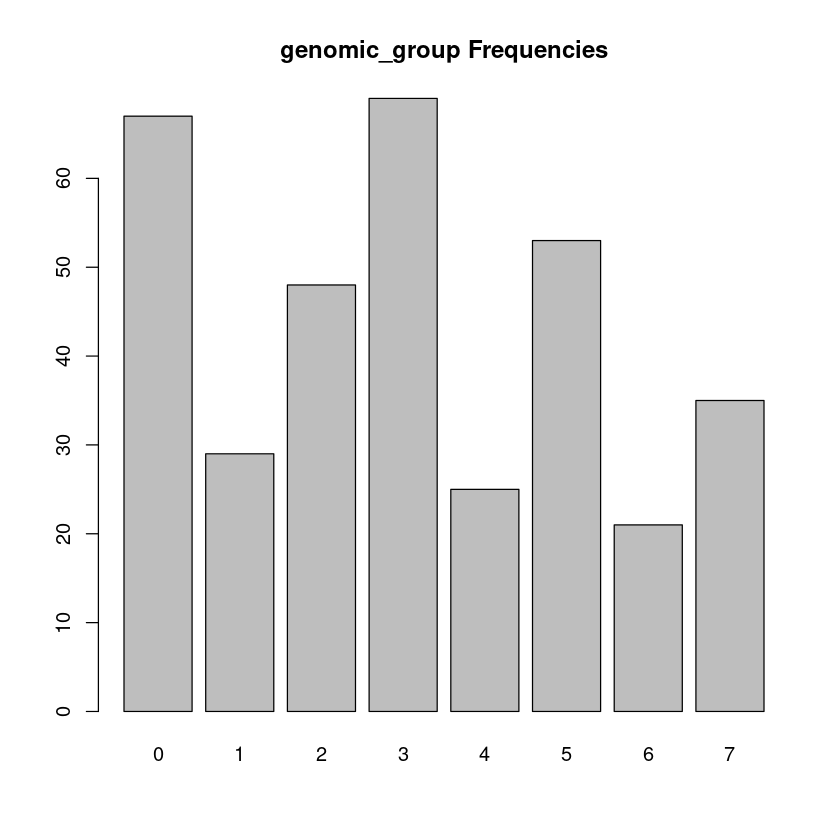

In [ ]:
bar_plot(list("genomic_group"))

### Hematological markers

In [ ]:
printNoneCount(list("hgb", "leu", "neut", "plt"))

132 None values in hgb
207 None values in leu
206 None values in neut
210 None values in plt


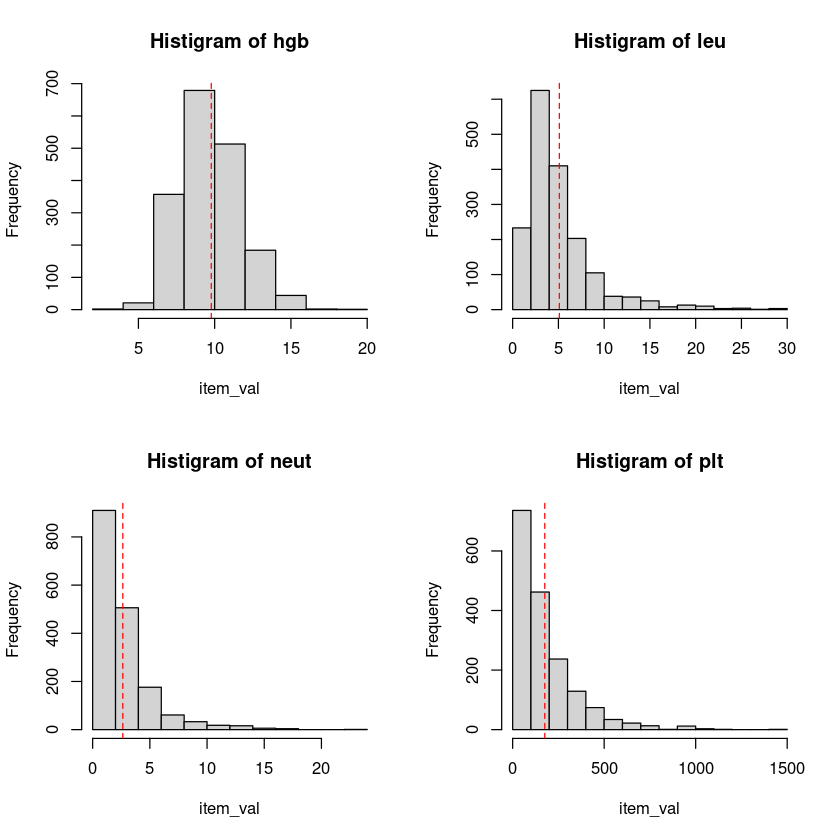

In [ ]:
hist_plot(list("hgb", "leu", "neut", "plt"), c(2,2), DNH)

### bmblasts

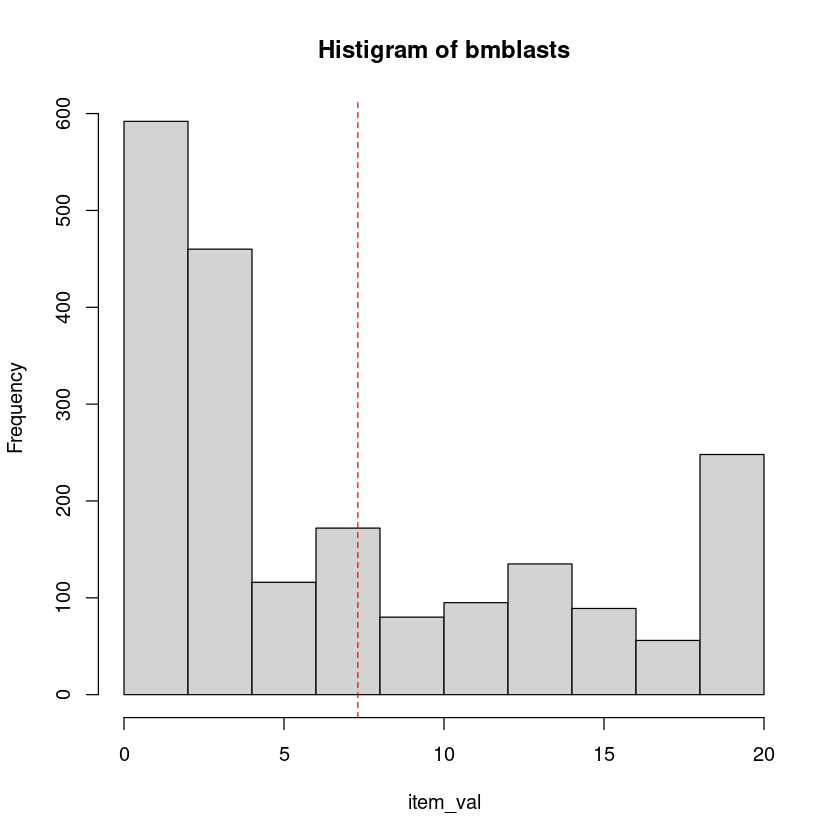

In [ ]:
hist_plot(list("bmblasts"), data=DNH)

### KT_IPSSR


KT_IPSSR
Frequencies:  0.03 0.73 0.12 0.06 0.06  
Number of None Values:   197  

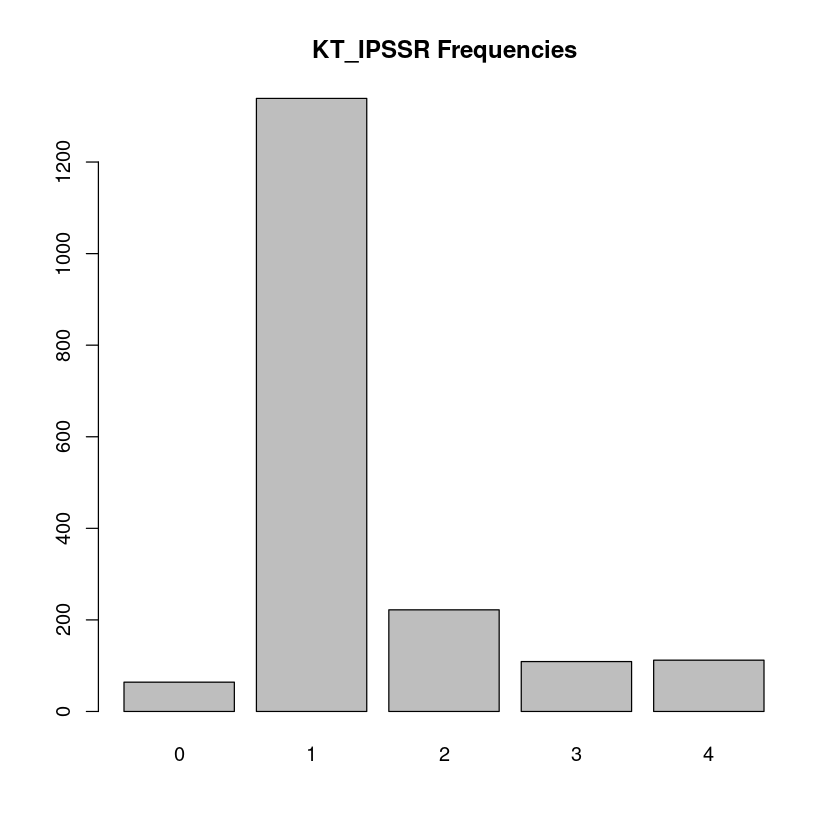

In [ ]:
bar_plot(list("KT_IPSSR"), data=DNH)

### KT_complex


KT_complex
Frequencies:  0.92 0.08  
Number of None Values:   197  

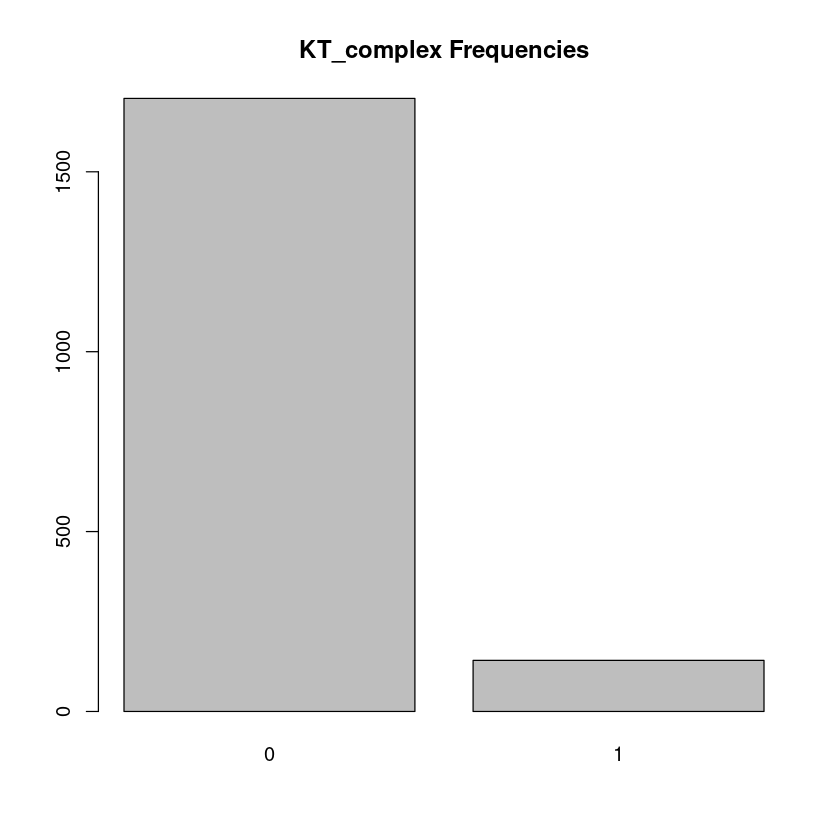

In [ ]:
bar_plot(list("KT_complex"), data=DNH, factor = TRUE)

### karyotype abnormalities 


del5q
Frequencies:  0.95 0.05  
Number of None Values:   232  
loss5
Frequencies:  0.95 0.05  
Number of None Values:   232  
loss7
Frequencies:  0.94 0.06  
Number of None Values:   232  
trisomy8
Frequencies:  0.94 0.06  
Number of None Values:   232  
loss9
Frequencies:  0.99 0.01  
Number of None Values:   232  
loss11
Frequencies:  0.98 0.02  
Number of None Values:   232  
loss12
Frequencies:  0.98 0.02  
Number of None Values:   232  
loss13
Frequencies:  0.99 0.01  
Number of None Values:   232  
isochr17
Frequencies:  0.98 0.02  
Number of None Values:   232  
loss20
Frequencies:  0.97 0.03  
Number of None Values:   232  
lossY
Frequencies:  0.93 0.07  
Number of None Values:   954  
idicX
Frequencies:  1 0  
Number of None Values:   232  

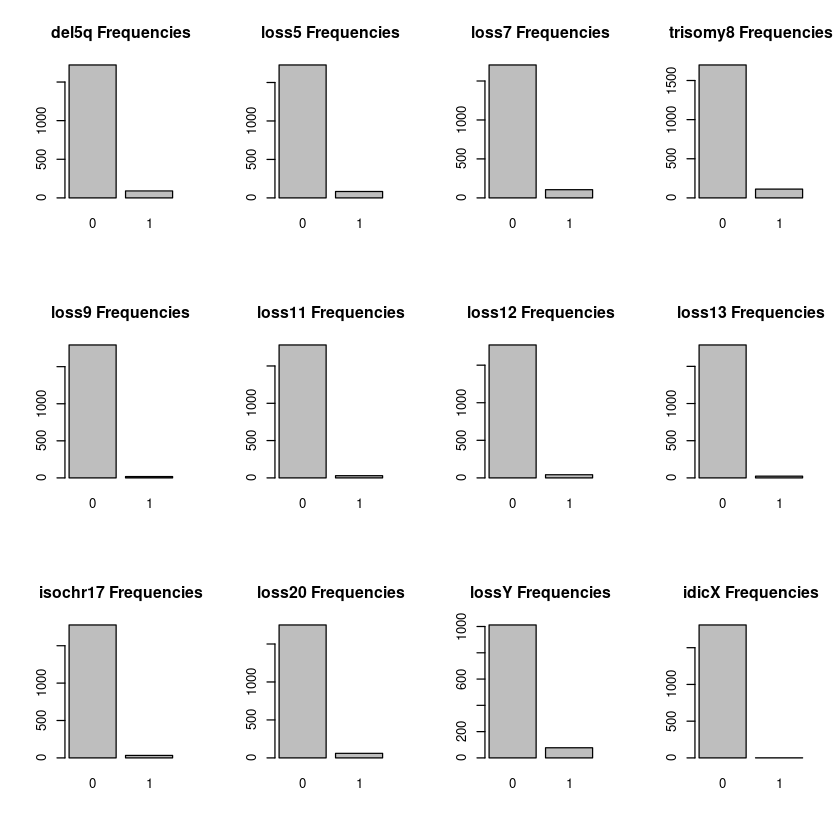

In [ ]:
ka <- list("del5q", "loss5", "loss7", "trisomy8", "loss9", "loss11",
          "loss12", "loss13", "isochr17", "loss20", "lossY", "idicX")
bar_plot(ka, c(3,4), data=DNH, factor = TRUE)

### n_ mutgenes
### n_mutations


n_mutgenes
Frequencies:  0.2 0.26 0.23 0.16 0.09  
Number of None Values:   0  
n_mutations
Frequencies:  0.2 0.23 0.19 0.16 0.1  
Number of None Values:   0  

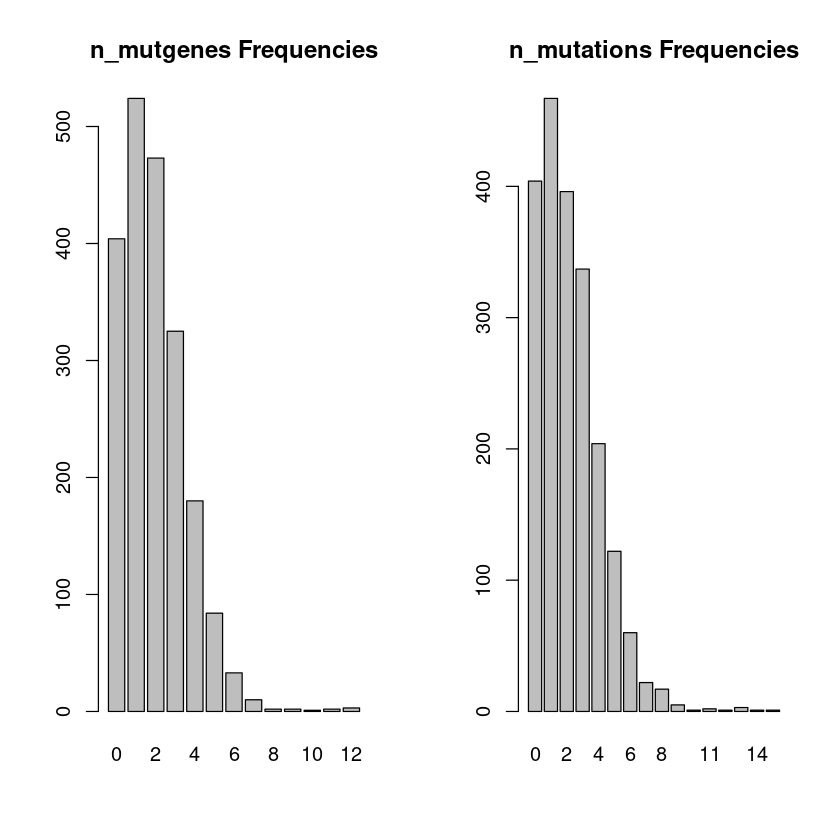

In [ ]:
bar_plot(list("n_mutgenes","n_mutations"), c(1,2), data=DNH,factor = TRUE)

### AML

AML evolution (no=0/ yes=1)


AML
Frequencies:  0.88 0.12  
Number of None Values:   0  

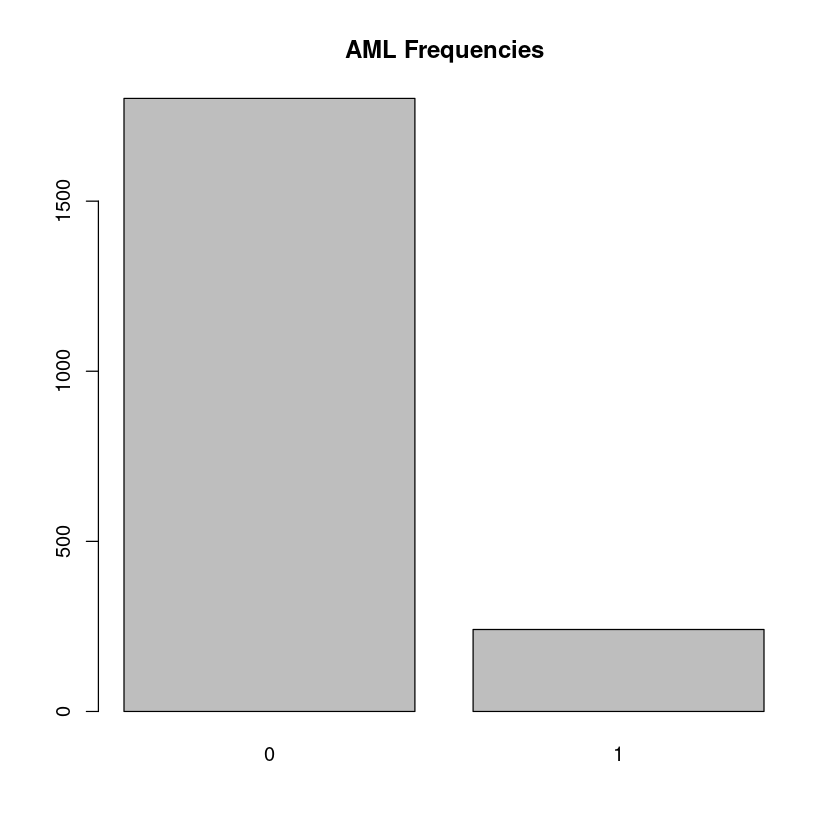

In [ ]:
bar_plot(list("AML"), data=DNH,factor = TRUE)

In [ ]:
printNoneCount(list("doaml", "dofup"))

789 None values in doaml
0 None values in dofup


### fup_status


fup_status
Frequencies:  0.71 0.29  
Number of None Values:   0  

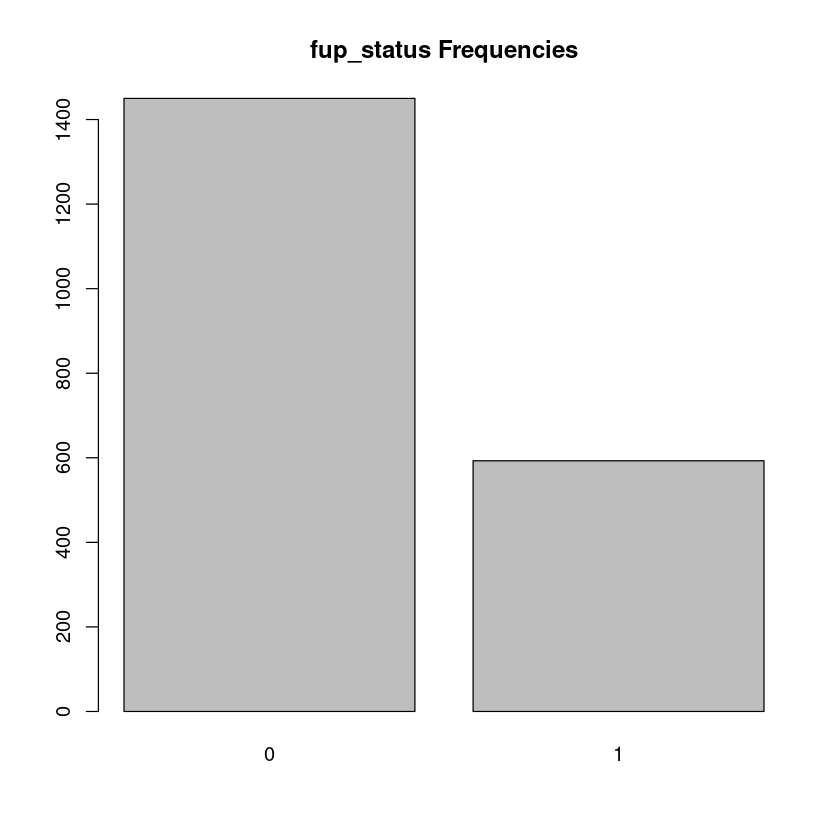

In [ ]:
bar_plot(list("fup_status"), data=DNH, factor = TRUE)

In [ ]:
detach(DNH)
attach(HSCT)

# Bivariate Analysis

## Helper Functions

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
cat_cat_plot <- function(dep_var, indep_var, data=HSCT){
    for (item in indep_var){
#         data <- select(data, dep_var, item)
        print(ggplot(filter(data, !is.na(data[[dep_var]]) | data[[dep_var]] != ""), 
                 aes_string(x = item, fill = dep_var)) + 
                    geom_bar(position = "dodge"))
        }
}

In [ ]:
# temp_df <- select(HSCT, c("IPSSR", "gender"))
# filter(temp_df, !is.na(IPSSR) | IPSSR != "")

## IPSSR vs categorical variables

In [ ]:
library(ggplot2)

In [ ]:
cat_vars_lst = list("gender", "age_prev", "age_hsct", 
                           "genomic_group", "KT_IPSSR", 
                           "KT_complex", "n_mutations", "n_mutgenes",
                           "relapse", "AML", "fup_status")


Warning message:
“Removed 395 rows containing non-finite values (stat_count).”


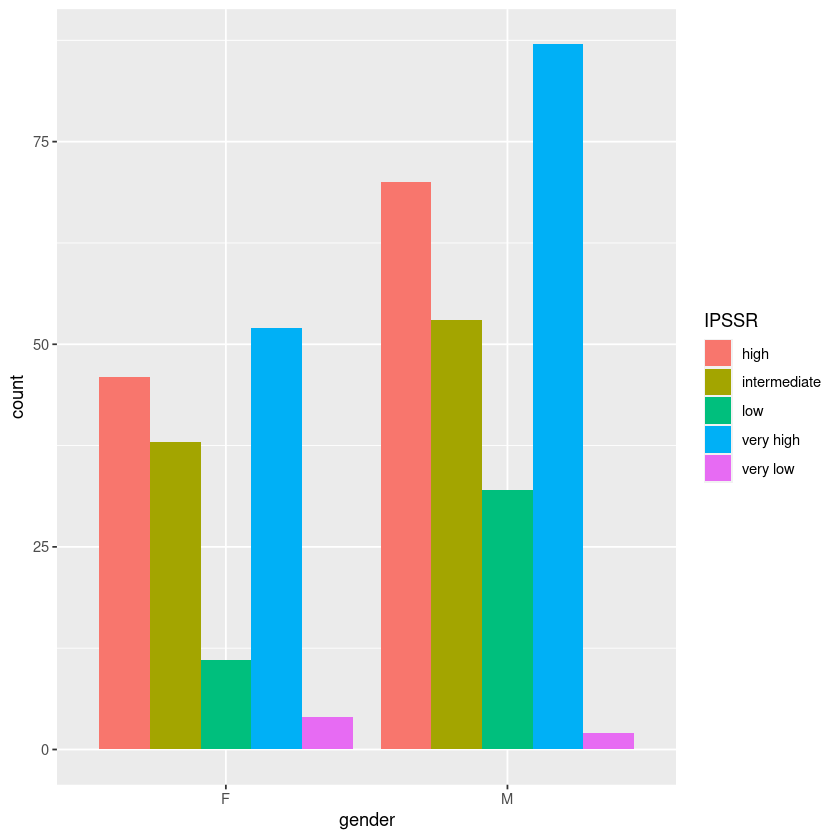

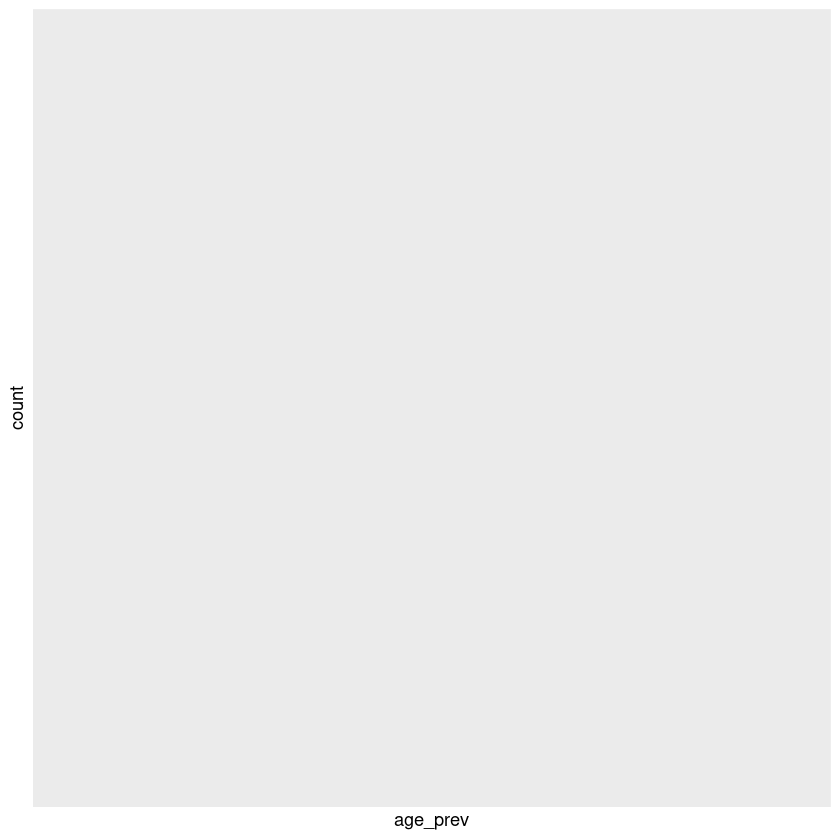

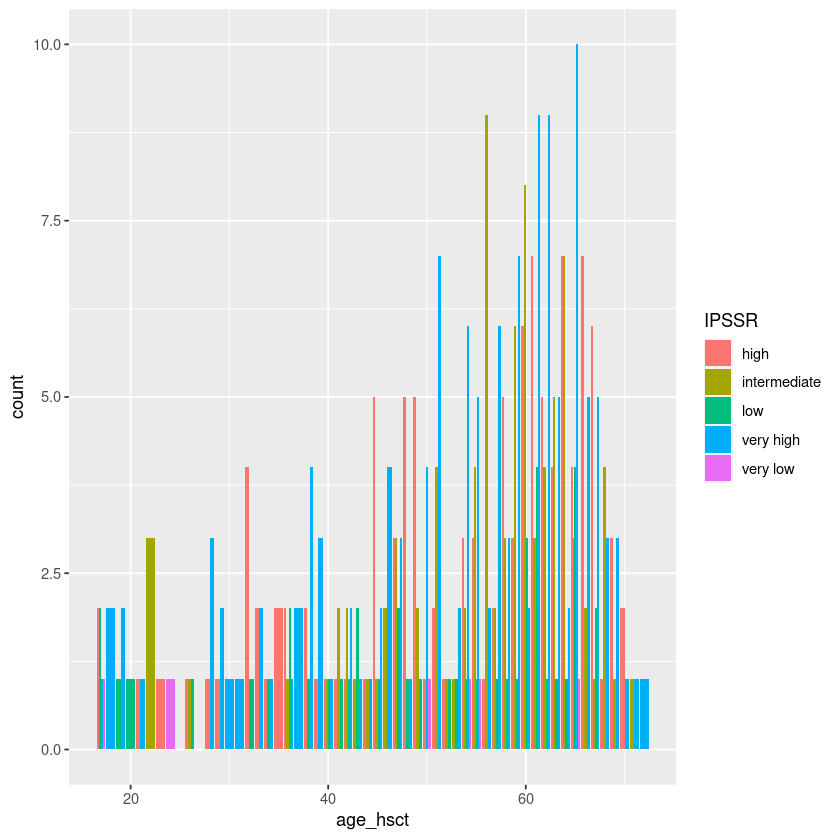

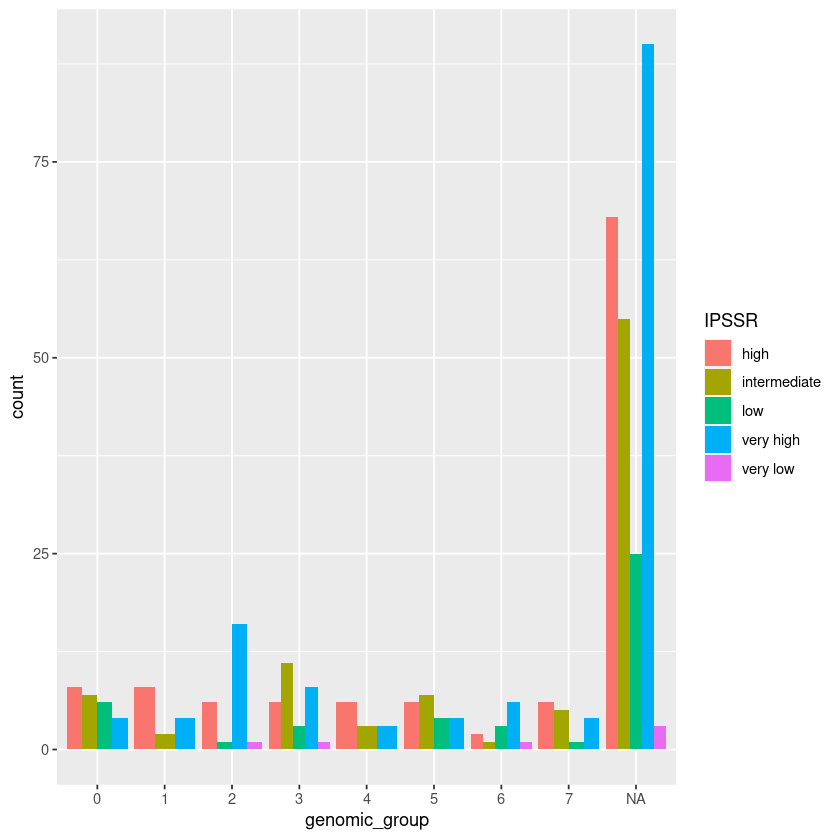

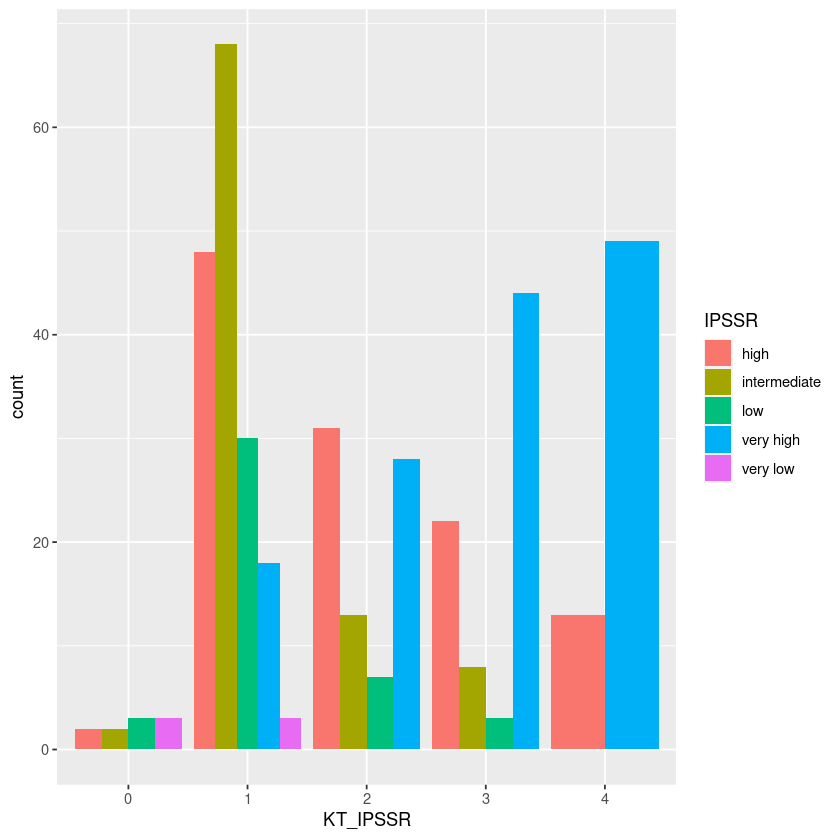

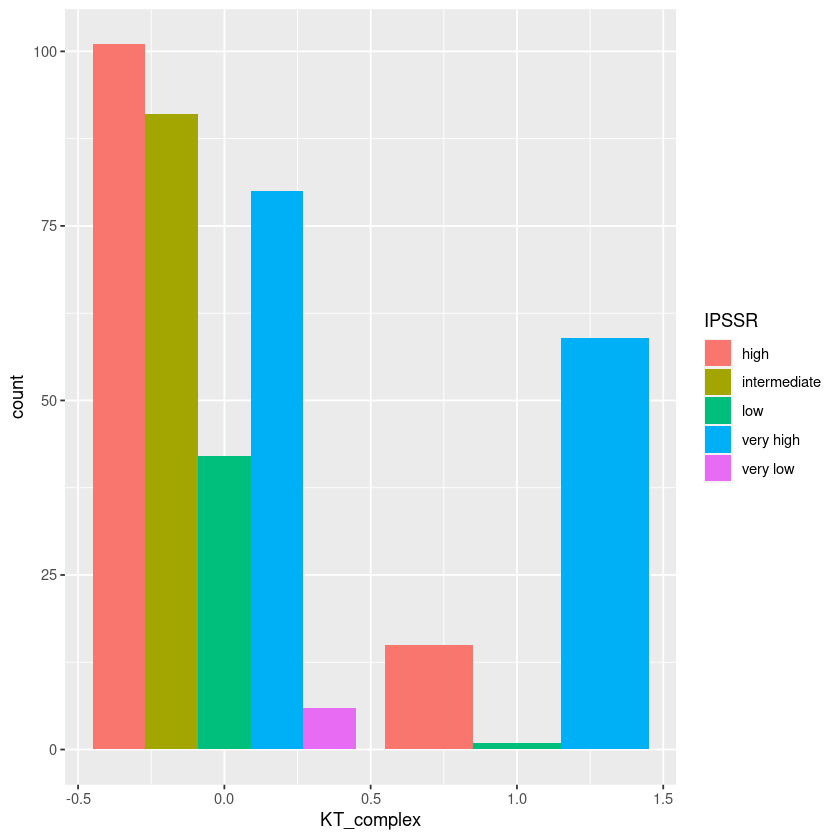

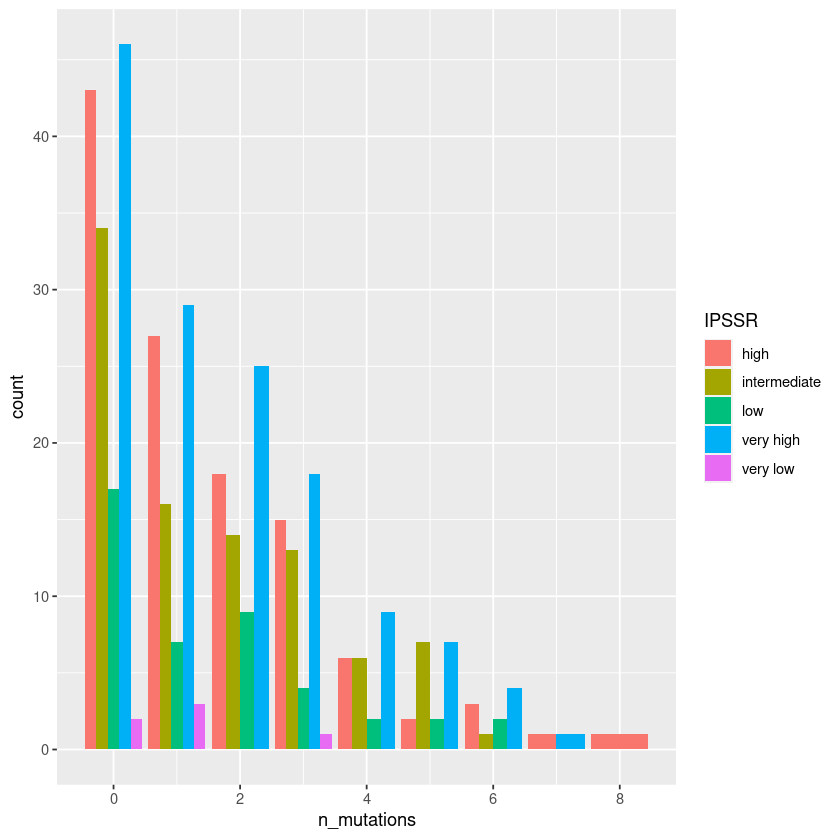

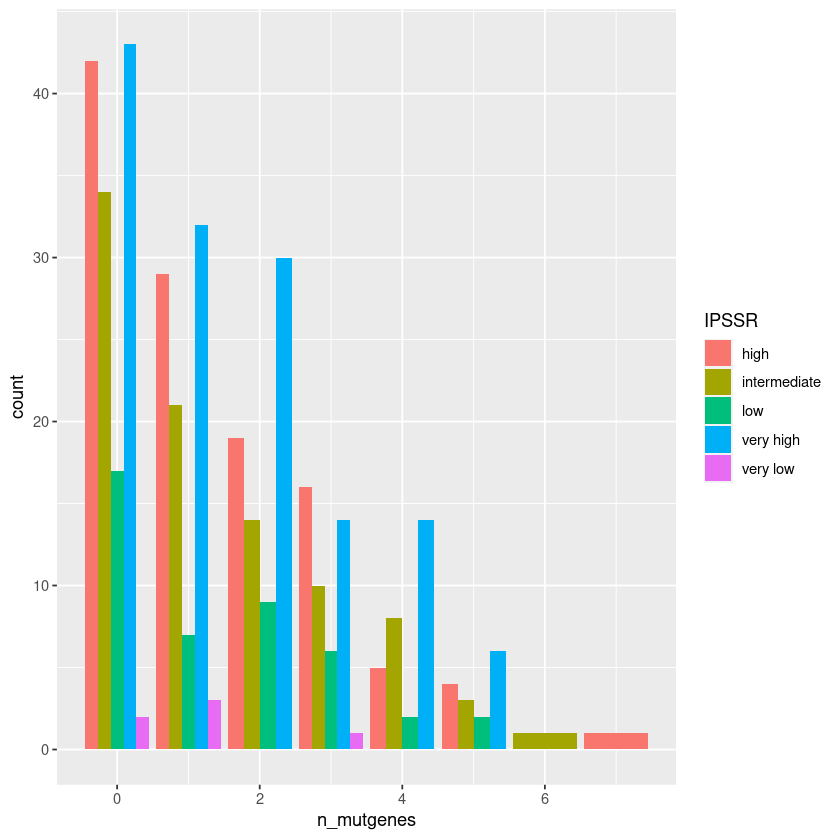

Warning message:
“Removed 395 rows containing non-finite values (stat_count).”


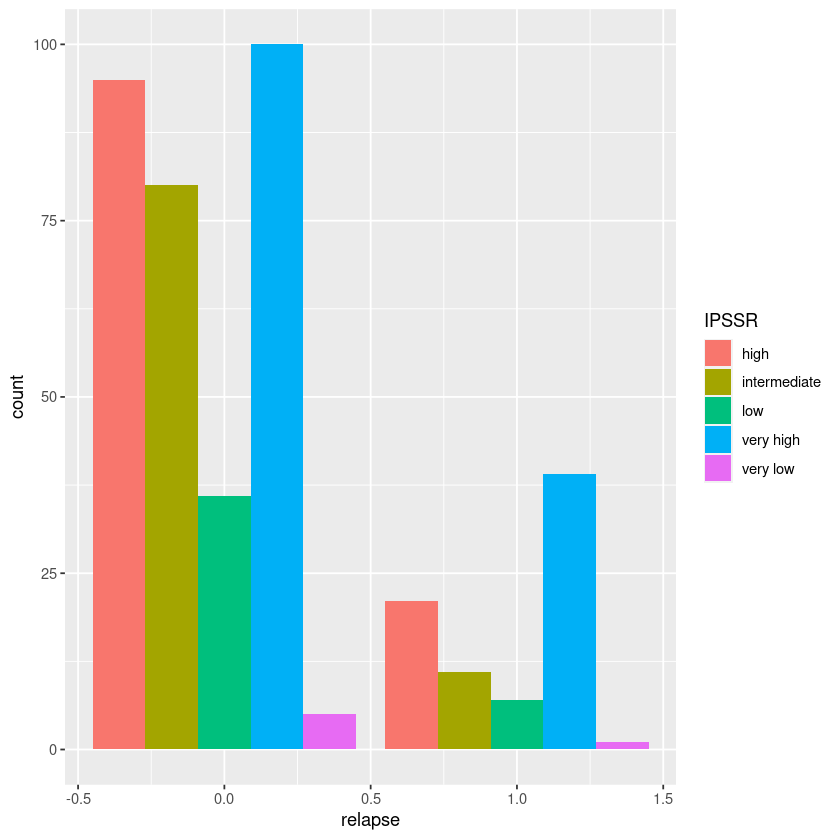

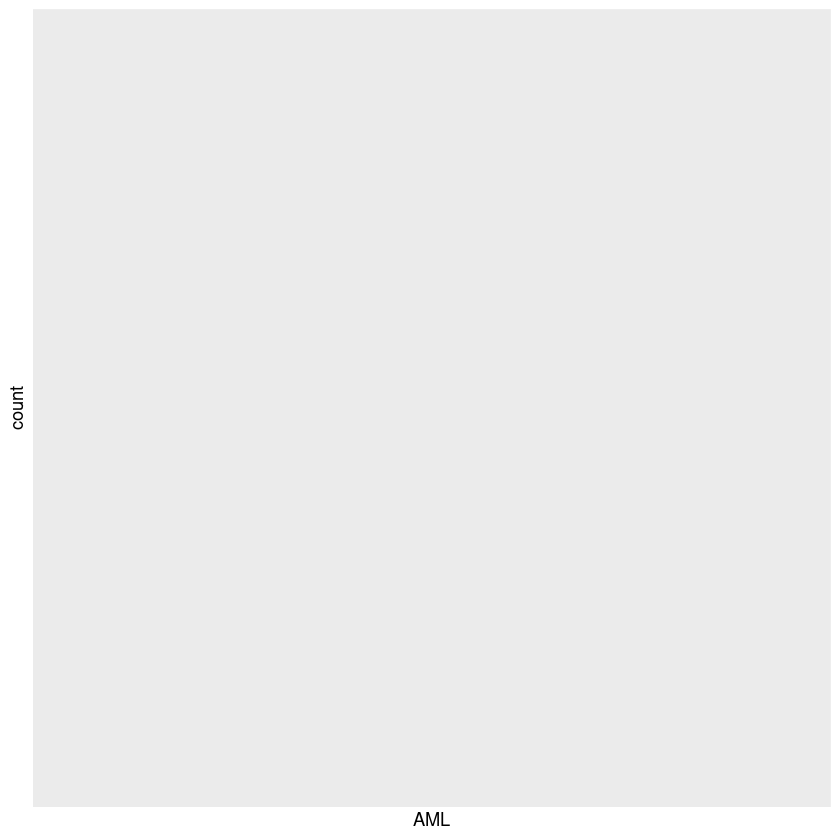

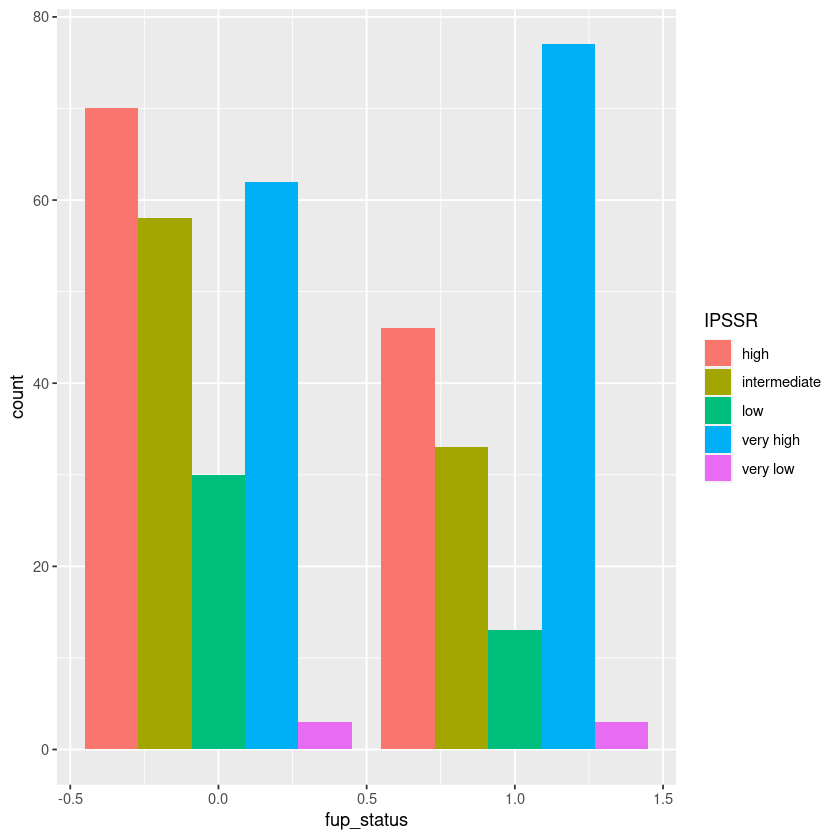

In [ ]:
cat_cat_plot("IPSSR", cat_vars_lst)

## WHO_hsct vs categorical variables


Warning message:
“Removed 719 rows containing non-finite values (stat_count).”


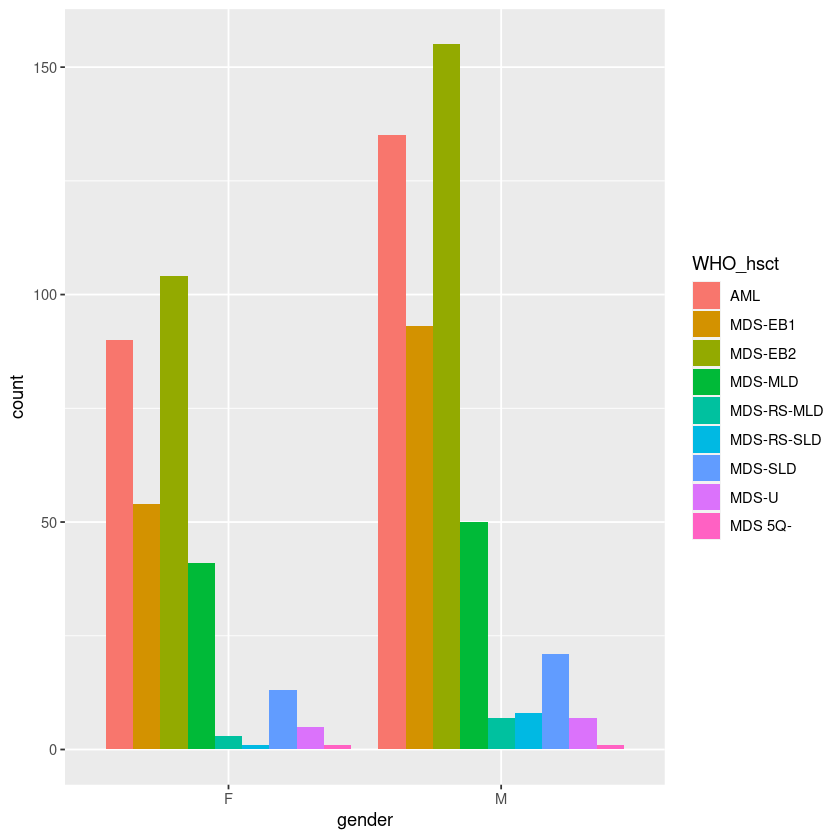

Warning message:
“Removed 79 rows containing non-finite values (stat_count).”
Warning message:
“position_dodge requires non-overlapping x intervals”


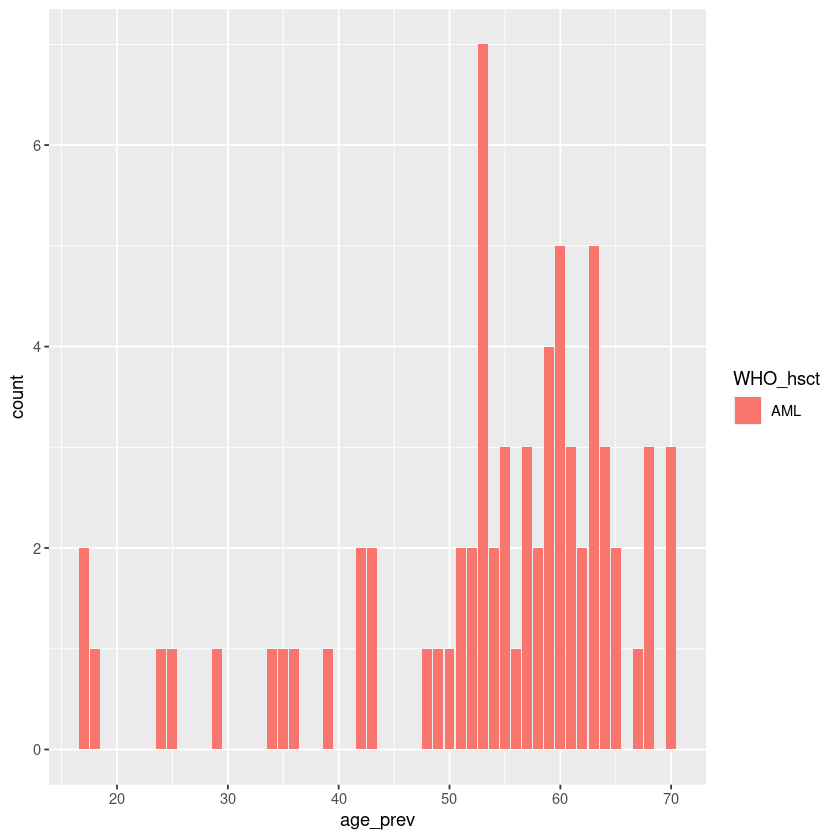

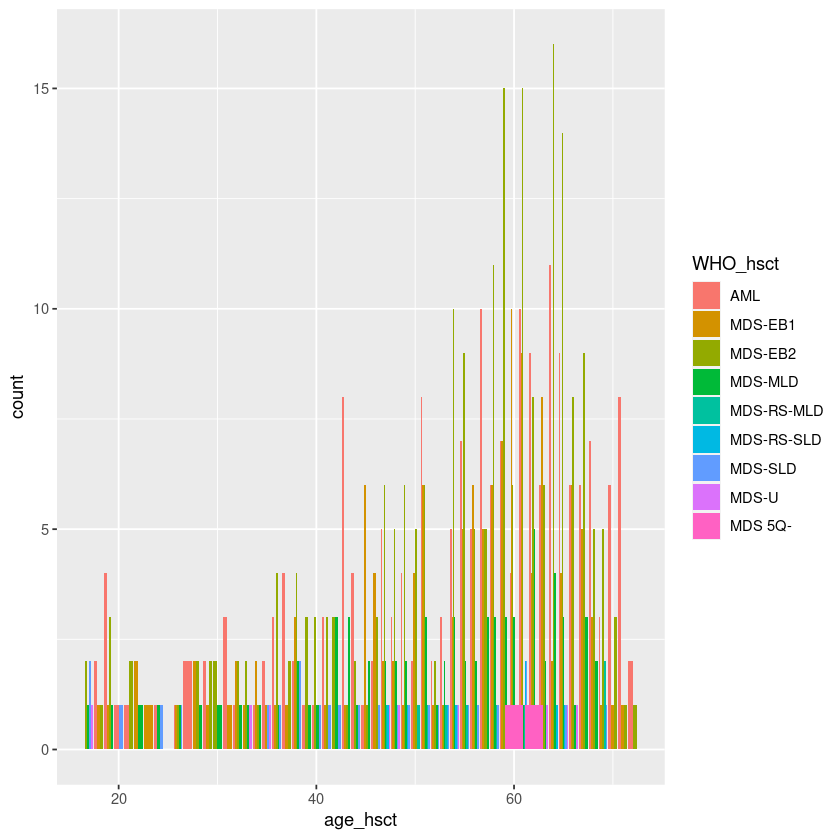

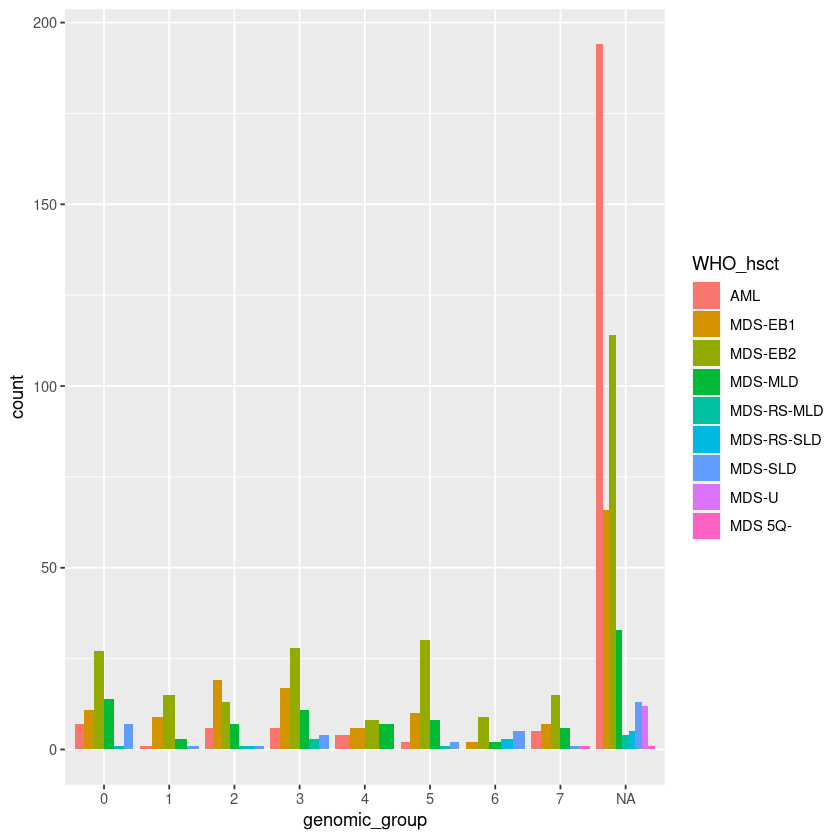

Warning message:
“Removed 97 rows containing non-finite values (stat_count).”


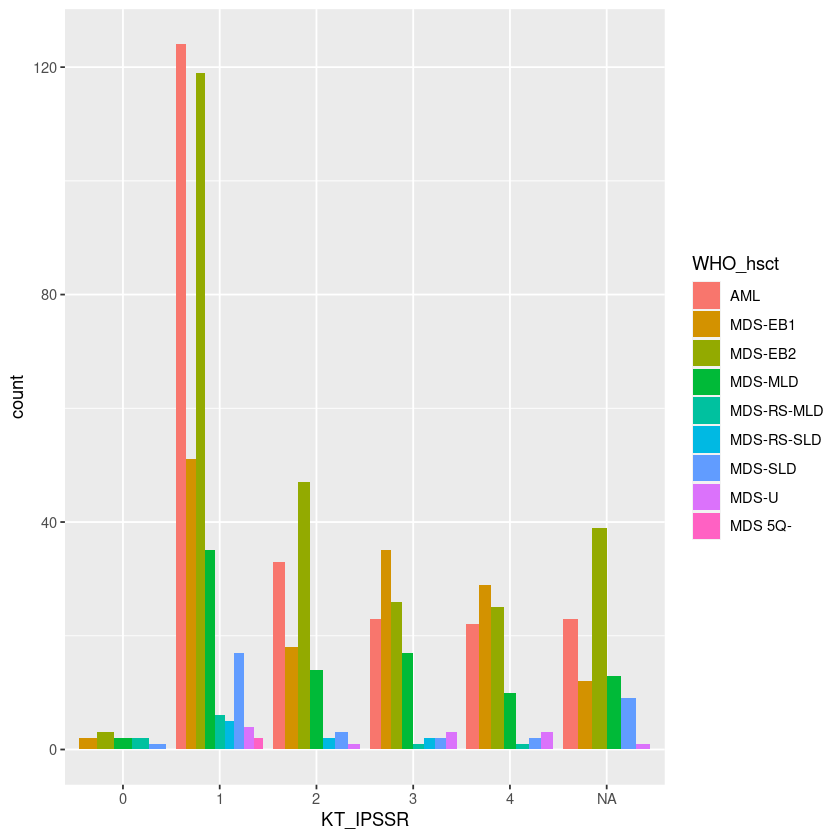

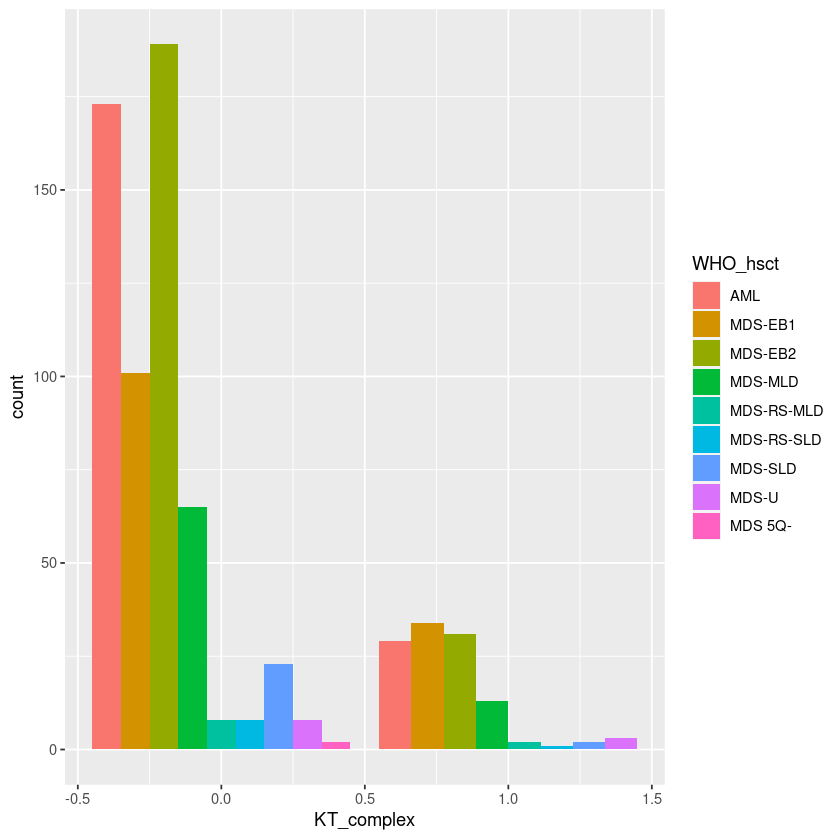

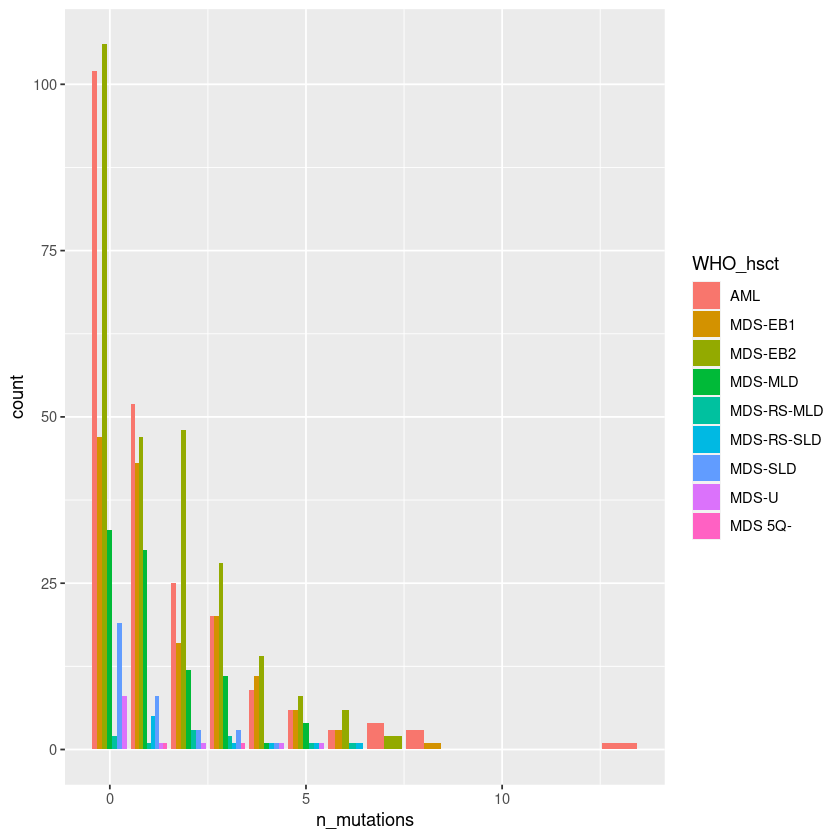

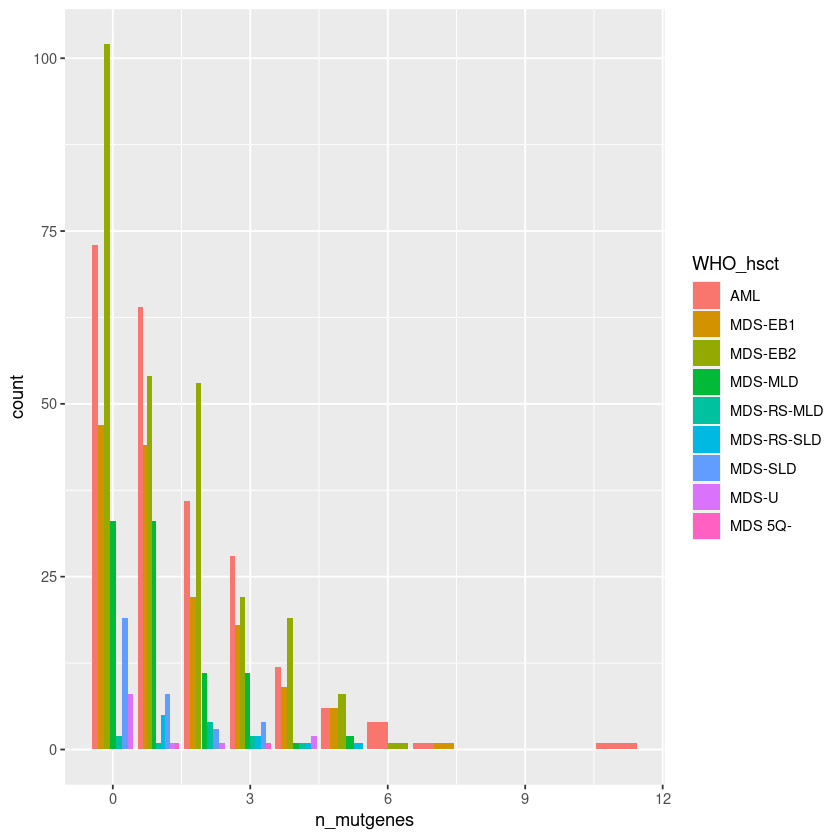

Warning message:
“Removed 789 rows containing non-finite values (stat_count).”


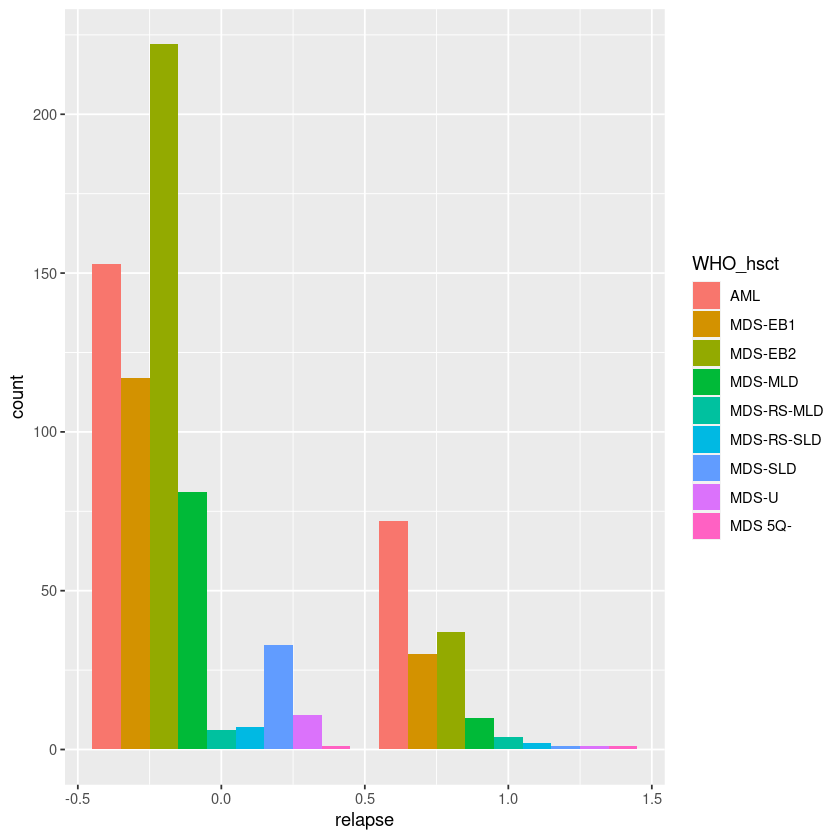

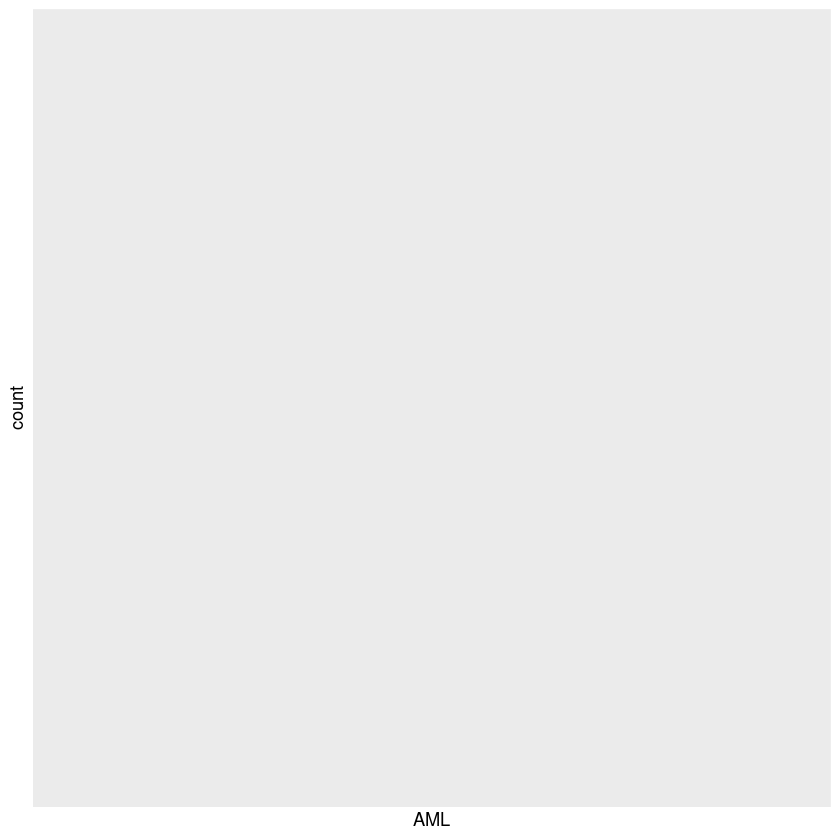

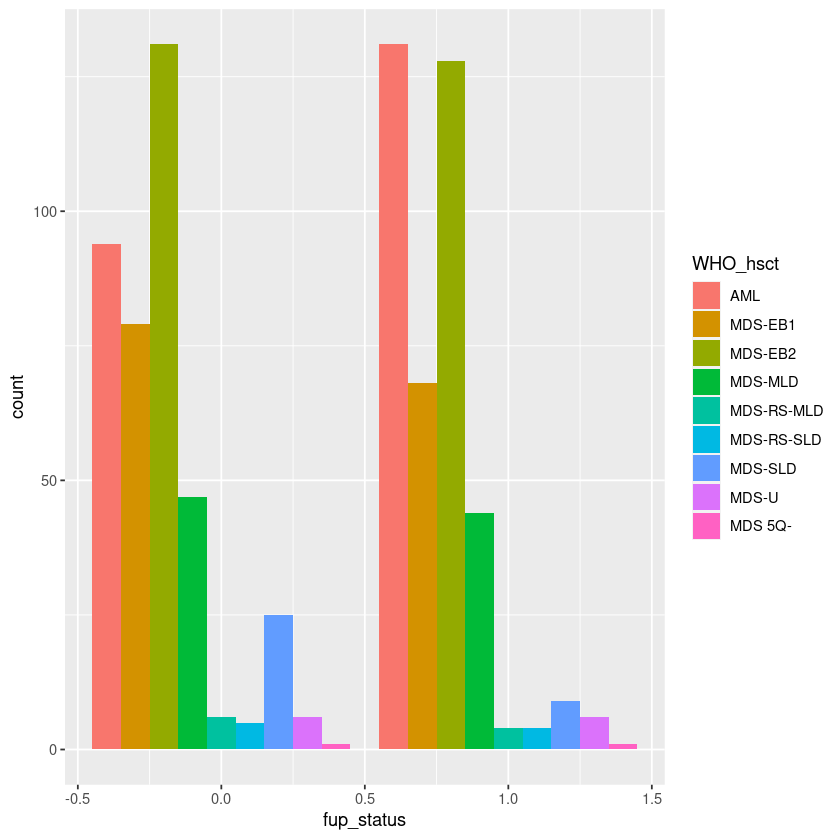

In [ ]:
cat_cat_plot("WHO_hsct", cat_vars_lst)